In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [ ]:
!pip install -q hvplot

In [ ]:
import hvplot.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data = pd.read_csv(
    '../input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv',
    parse_dates=['issue_d','earliest_cr_line'], infer_datetime_format=True,low_memory=False)
df_train = data[(data.issue_d >= '2007-01-01 00:00:00') & (data.issue_d < '2018-01-01 00:00:00')]
df_train = df_train.reset_index(drop=True)

df_test = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
df_test = df_test.reset_index(drop=True)


In [ ]:
df_train.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0     13.99       123.03     C        C4                      leadman   
1     11.99       820.28     C        C1                     Engineer   
2     10.78       432.66     B        B4                 truck driver   
3     14.85       829.90     C        C5  Information Systems Officer   
4     22.45       289.91     F        F1          Contract Specialist   

  emp_length home_ownership  annual_inc verification_status    issue_d  \
0  10+ years       MORTGAGE     55000.0        Not Verified 2015-12-01   
1  10+ years       MORTGAGE     65000.0        Not Verified 2015-12-01   
2  10+ years       MORTGAGE     63000.0        Not Verified 2015-12-01   
3  10+ years       MORTGAGE    110000.0     Source Verified 2015-12-01   
4    3 years       MORTGAGE    104433.0     Source Verified 2015-12-01   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
2  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3     Current          n  https://lendingclub.com/browse/loanDetail.acti...   
4  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   

  desc             purpose               title zip_code addr_state    dti  \
0  NaN  debt_consolidation  Debt consolidation    190xx         PA   5.91   
1  NaN      small_business            Business    577xx         SD  16.06   
2  NaN    home_improvement                 NaN    605xx         IL  10.78   
3  NaN  debt_consolidation  Debt consolidation    076xx         NJ  17.06   
4  NaN      major_purchase      Major purchase    174xx         PA  25.37   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0       2003-08-01           675.0            679.0   
1          1.0       1999-12-01           715.0            719.0   
2          0.0       2000-08-01           695.0            699.0   
3          0.0       2008-09-01           785.0            789.0   
4          1.0       1998-06-01           695.0            699.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                    30.0                     NaN       7.0   
1             4.0                     6.0                     NaN      22.0   
2             0.0                     NaN                     NaN       6.0   
3             0.0                     NaN                     NaN      13.0   
4             3.0                    12.0                     NaN      12.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0     2765.0        29.7       13.0                   w       0.00   
1      0.0    21470.0        19.2       38.0                   w       0.00   
2      0.0     7869.0        56.2       18.0                   w       0.00   
3      0.0     7802.0        11.6       17.0                   w   15897.65   
4      0.0    21929.0        64.5       35.0                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   4421.723917          4421.72          3600.00   
1           0.00  25679.660000         25679.66         24700.00   
2           0.00  22705.924294         22705.92         20000.00   
3       15897.65  31464.010000         31464.01         19102.35   
4           0

In [ ]:
df_test.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  130954621        NaN     5000.0       5000.0           5000.0   36 months   
1  130964697        NaN    15000.0      15000.0          15000.0   36 months   
2  130955326        NaN    11200.0      11200.0          11200.0   60 months   
3  130504052        NaN    25000.0      25000.0          25000.0   60 months   
4  130956066        NaN     3000.0       3000.0           3000.0   36 months   

   int_rate  installment grade sub_grade           emp_title emp_length  \
0     20.39       186.82     D        D4     General Manager    8 years   
1      9.92       483.45     B        B2        IT Director     2 years   
2     30.79       367.82     G        G1    Client services    < 1 year   
3     21.85       688.35     D        D5  Asphalt Supervisor  10+ years   
4      7.34        93.10     A        A4    Scale Technician    9 years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     50000.0            Verified 2018-03-01     Current   
1            OWN    196000.0     Source Verified 2018-03-01     Current   
2           RENT     44000.0        Not Verified 2018-03-01     Current   
3       MORTGAGE     65000.0     Source Verified 2018-03-01     Current   
4           RENT     52000.0     Source Verified 2018-03-01  Fully Paid   

  pymnt_plan                                                url desc  \
0          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
1          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
3          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
4          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   

              purpose               title zip_code addr_state    dti  \
0               other               Other    740xx         OK  21.80   
1  debt_consolidation  Debt consolidation    337xx         FL  18.29   
2             medical    Medical expenses    030xx         NH  43.97   
3  debt_consolidation  Debt consolidation    361xx         AL  12.89   
4      major_purchase      Major purchase    988xx         WA   0.58   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          1.0       2009-01-01           665.0            669.0   
1          0.0       1998-07-01           700.0            704.0   
2          1.0       2007-07-01           665.0            669.0   
3          1.0       1995-03-01           665.0            669.0   
4          0.0       1998-01-01           760.0            764.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                     9.0                     NaN       5.0   
1             0.0                    65.0                     NaN      19.0   
2             2.0                     6.0                     NaN       8.0   
3             1.0                    22.0                     NaN       7.0   
4             0.0                    26.0                     NaN       7.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0      116.0        23.2       18.0                   w    3780.31   
1      0.0    24243.0        46.3       53.0                   w   10878.50   
2      0.0     1526.0        24.6       14.0                   w   10193.73   
3      0.0     8657.0        98.4       16.0                   w   22188.73   
4      0.0      141.0         0.5       30.0                   w       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3780.31  2043.690000          2043.69          1219.69   
1       10878.50  5301.420000          5301.42          4121.50   
2       10193.73  4007.700000          4007.70          1006.27   
3       22188.73  7511.160000          7511.16          2811.27   
4           0.00  3011.577285          3011.58          3000.00   


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Columns: 151 entries, id to settlement_term
dtypes: datetime64[ns](2), float64(113), object(36)
memory usage: 2.0+ GB


In [ ]:
df_train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
#Inference: There are many features which have null values while others are not needed to predict credit worthiness

#Dropping features that are insignificant
drop_cols = ['id','member_id','funded_amnt_inv','url','desc','zip_code','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_record','total_rec_late_fee','recoveries','collection_recovery_fee','next_pymnt_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt']

train = df_train.drop(drop_cols,axis=1)

In [ ]:
train.head()

loan_amnt  funded_amnt        term  int_rate  installment grade sub_grade  \
0     3600.0       3600.0   36 months     13.99       123.03     C        C4   
1    24700.0      24700.0   36 months     11.99       820.28     C        C1   
2    20000.0      20000.0   60 months     10.78       432.66     B        B4   
3    35000.0      35000.0   60 months     14.85       829.90     C        C5   
4    10400.0      10400.0   60 months     22.45       289.91     F        F1   

                     emp_title emp_length home_ownership  annual_inc  \
0                      leadman  10+ years       MORTGAGE     55000.0   
1                     Engineer  10+ years       MORTGAGE     65000.0   
2                 truck driver  10+ years       MORTGAGE     63000.0   
3  Information Systems Officer  10+ years       MORTGAGE    110000.0   
4          Contract Specialist    3 years       MORTGAGE    104433.0   

  verification_status    issue_d loan_status pymnt_plan             purpose  \
0        Not Verified 2015-12-01  Fully Paid          n  debt_consolidation   
1        Not Verified 2015-12-01  Fully Paid          n      small_business   
2        Not Verified 2015-12-01  Fully Paid          n    home_improvement   
3     Source Verified 2015-12-01     Current          n  debt_consolidation   
4     Source Verified 2015-12-01  Fully Paid          n      major_purchase   

                title addr_state    dti  delinq_2yrs earliest_cr_line  \
0  Debt consolidation         PA   5.91          0.0       2003-08-01   
1            Business         SD  16.06          1.0       1999-12-01   
2                 NaN         IL  10.78          0.0       2000-08-01   
3  Debt consolidation         NJ  17.06          0.0       2008-09-01   
4      Major purchase         PA  25.37          1.0       1998-06-01   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                    30.0       7.0      0.0     2765.0        29.7   
1                     6.0      22.0      0.0    21470.0        19.2   
2                     NaN       6.0      0.0     7869.0        56.2   
3                     NaN      13.0      0.0     7802.0        11.6   
4                    12.0      12.0      0.0    21929.0        64.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0       13.0                   w       0.00           0.00   4421.723917   
1       38.0                   w       0.00           0.00  25679.660000   
2       18.0                   w       0.00           0.00  22705.924294   
3       17.0                   w   15897.65       15897.65  31464.010000   
4       35.0                   w       0.00           0.00  11740.500000   

   total_pymnt_inv  total_rec_prncp  total_rec_int last_pymnt_d  \
0          4421.72          3600.00         821.72     Jan-2019   
1         25679.66         24700.00         979.66     Jun-2016   
2         22705.92         20000.00        2705.92     Jun-2017   
3         31464.01         19102.35       12361.66     Feb-2019   
4         11740.50         10400.00        1340.50     Jul-2016   

   last_pymnt_amnt  mths_since_last_major_derog application_type  tot_cur_bal  \
0           122.67                         30.0       Individual     144904.0   
1           926.35                          NaN       Individual     204396.0   
2         15813.30                          NaN        Joint App     189699.0   
3           829.90                          NaN       Individual     301500.0   
4         10128.96                          NaN       Individual     331730.0   

   open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0          2.0          2.0          0.0          1.0                21.0   
1          1.0          1.0          0.0          1.0                19.0   
2          0.0          1.0          0.0          4.0                19.0   
3          1.0          1.0          0.0          1.0                23.0   
4          1.0  

In [ ]:
train.columns.get_loc('revol_bal_joint')

91

In [ ]:
train = train.drop(train.iloc[:, 90:],axis = 1)

In [ ]:
drop_cols = ['id','member_id','pymnt_plan','url','desc','zip_code','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_record','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','next_pymnt_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt']

test = df_test.drop(drop_cols,axis=1)
test = test.drop(test.iloc[:, 90:],axis = 1)

In [ ]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     5000.0       5000.0           5000.0   36 months     20.39       186.82   
1    15000.0      15000.0          15000.0   36 months      9.92       483.45   
2    11200.0      11200.0          11200.0   60 months     30.79       367.82   
3    25000.0      25000.0          25000.0   60 months     21.85       688.35   
4     3000.0       3000.0           3000.0   36 months      7.34        93.10   

  grade sub_grade           emp_title emp_length home_ownership  annual_inc  \
0     D        D4     General Manager    8 years           RENT     50000.0   
1     B        B2        IT Director     2 years            OWN    196000.0   
2     G        G1    Client services    < 1 year           RENT     44000.0   
3     D        D5  Asphalt Supervisor  10+ years       MORTGAGE     65000.0   
4     A        A4    Scale Technician    9 years           RENT     52000.0   

  verification_status    issue_d loan_status             purpose  \
0            Verified 2018-03-01     Current               other   
1     Source Verified 2018-03-01     Current  debt_consolidation   
2        Not Verified 2018-03-01     Current             medical   
3     Source Verified 2018-03-01     Current  debt_consolidation   
4     Source Verified 2018-03-01  Fully Paid      major_purchase   

                title addr_state    dti  delinq_2yrs earliest_cr_line  \
0               Other         OK  21.80          1.0       2009-01-01   
1  Debt consolidation         FL  18.29          0.0       1998-07-01   
2    Medical expenses         NH  43.97          1.0       2007-07-01   
3  Debt consolidation         AL  12.89          1.0       1995-03-01   
4      Major purchase         WA   0.58          0.0       1998-01-01   

   mths_since_last_delinq  open_acc  revol_bal  revol_util  total_acc  \
0                     9.0       5.0      116.0        23.2       18.0   
1                    65.0      19.0    24243.0        46.3       53.0   
2                     6.0       8.0     1526.0        24.6       14.0   
3                    22.0       7.0     8657.0        98.4       16.0   
4                    26.0       7.0      141.0         0.5       30.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w    3780.31        3780.31  2043.690000          2043.69   
1                   w   10878.50       10878.50  5301.420000          5301.42   
2                   w   10193.73       10193.73  4007.700000          4007.70   
3                   w   22188.73       22188.73  7511.160000          7511.16   
4                   w       0.00           0.00  3011.577285          3011.58   

   total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
0          1219.69         824.00     Mar-2019           186.82   
1          4121.50        1179.92     Feb-2019           483.45   
2          1006.27        3001.43     Feb-2019           367.82   
3          2811.27        4699.89     Feb-2019           688.35   
4          3000.00          11.58     May-2018           614.03   

   mths_since_last_major_derog application_type  tot_cur_bal  open_acc_6m  \
0                          9.0       Individual      19344.0          0.0   
1                          NaN       Individual     534954.0          4.0   
2                         70.0        Joint App      67173.0          1.0   
3                         23.0       Individual      74795.0          0.0   
4                          NaN       Individual     150592.0          0.0   

   open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  \
0          2.0          0.0          1.0                16.0       14118.0   
1          3.0          2.0          2.0                 6.0      113470.0   
2          4.0          1.0          4.0                 8.0       65647.0   
3          2.0          0.0          2.0                16.0        8382.0   
4          

In [ ]:
#Unwanted columns dropped
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 90 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   loan_amnt                       float64       
 1   funded_amnt                     float64       
 2   term                            object        
 3   int_rate                        float64       
 4   installment                     float64       
 5   grade                           object        
 6   sub_grade                       object        
 7   emp_title                       object        
 8   emp_length                      object        
 9   home_ownership                  object        
 10  annual_inc                      float64       
 11  verification_status             object        
 12  issue_d                         datetime64[ns]
 13  loan_status                     object        
 14  pymnt_plan                      object        
 15

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495242 entries, 0 to 495241
Data columns (total 90 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   loan_amnt                       495242 non-null  float64       
 1   funded_amnt                     495242 non-null  float64       
 2   funded_amnt_inv                 495242 non-null  float64       
 3   term                            495242 non-null  object        
 4   int_rate                        495242 non-null  float64       
 5   installment                     495242 non-null  float64       
 6   grade                           495242 non-null  object        
 7   sub_grade                       495242 non-null  object        
 8   emp_title                       440583 non-null  object        
 9   emp_length                      453255 non-null  object        
 10  home_ownership                  495242 non-null  object 

In [ ]:
#EDA
train.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'mths_since_last_major_derog', 'application_type', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_w

In [ ]:
train.head(2)

loan_amnt  funded_amnt        term  int_rate  installment grade sub_grade  \
0     3600.0       3600.0   36 months     13.99       123.03     C        C4   
1    24700.0      24700.0   36 months     11.99       820.28     C        C1   

  emp_title emp_length home_ownership  annual_inc verification_status  \
0   leadman  10+ years       MORTGAGE     55000.0        Not Verified   
1  Engineer  10+ years       MORTGAGE     65000.0        Not Verified   

     issue_d loan_status pymnt_plan             purpose               title  \
0 2015-12-01  Fully Paid          n  debt_consolidation  Debt consolidation   
1 2015-12-01  Fully Paid          n      small_business            Business   

  addr_state    dti  delinq_2yrs earliest_cr_line  mths_since_last_delinq  \
0         PA   5.91          0.0       2003-08-01                    30.0   
1         SD  16.06          1.0       1999-12-01                     6.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       7.0      0.0     2765.0        29.7       13.0                   w   
1      22.0      0.0    21470.0        19.2       38.0                   w   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0   4421.723917          4421.72           3600.0   
1        0.0            0.0  25679.660000         25679.66          24700.0   

   total_rec_int last_pymnt_d  last_pymnt_amnt  mths_since_last_major_derog  \
0         821.72     Jan-2019           122.67                         30.0   
1         979.66     Jun-2016           926.35                          NaN   

  application_type  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  \
0       Individual     144904.0          2.0          2.0          0.0   
1       Individual     204396.0          1.0          1.0          0.0   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          1.0                21.0        4981.0     36.0          3.0   
1          1.0                19.0       18005.0     73.0          2.0   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
0          3.0       722.0      34.0            9300.0     3.0          1.0   
1          3.0      6472.0      29.0          111800.0     0.0          0.0   

   inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
0           4.0                   4.0      20701.0          1506.0     37.2   
1           6.0                   4.0       9733.0         57830.0     27.1   

   chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  \
0                       0.0          0.0               148.0   
1                       0.0          0.0               113.0   

   mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
0                 128.0                    3.0             3.0       1.0   
1                 192.0                    2.0             2.0       4.0   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                   4.0                      69.0                    4.0   
1                   2.0                       NaN                    0.0   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                            69.0                    2.0             2.0   
1                             6.0                    0.0             5.0   

   num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
0              4.0          2.0        5.0        3.0            4.0   
1              5.0         13.0       17.0        6.0           20.0   

   num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
0            9.0                  4.0       7.0               0.0   
1           27.0                  5.0      22.0               0.0   

   num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
0           0.0                 0.0                 3.0    

In [ ]:
# #Checking Missings values with Heatmap
# plt.figure(figsize=(20,7))  #setting the figure size
# sns.heatmap(train.isna().transpose())  #heat map to plot the above table
# plt.show()

In [ ]:
#Univariate Plots

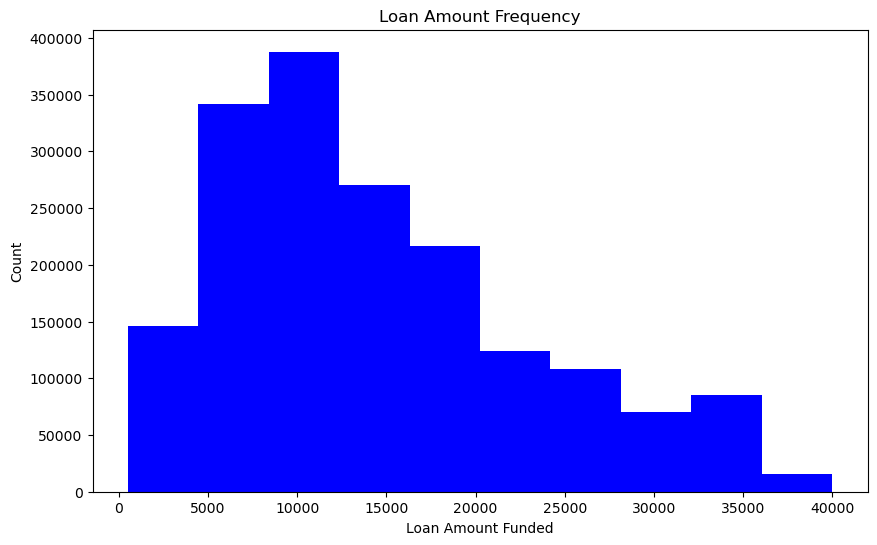

In [ ]:
#Distplot for loan amount
plt.figure(figsize=(10,6))
plt.hist(train['funded_amnt'],color='blue')
plt.xlabel('Loan Amount Funded')
plt.ylabel('Count')
plt.title('Loan Amount Frequency')
plt.show()

In [ ]:
train['funded_amnt'].skew()

0.7561129978305136

<Axes: >

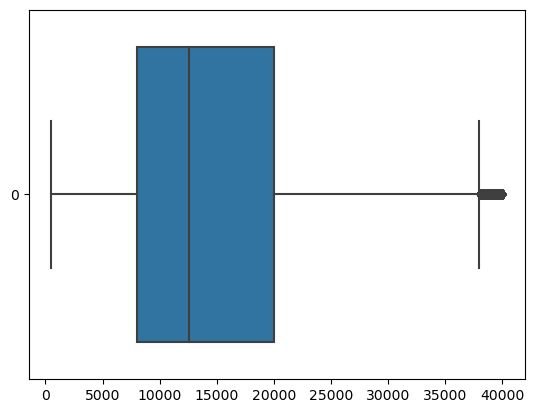

In [ ]:
sns.boxplot(train['funded_amnt'],orient="h")

In [ ]:
train['int_rate'].value_counts()

11.99    49738
5.32     44640
10.99    44165
13.99    43025
11.49    32010
         ...  
17.78        1
13.19        1
22.64        1
16.90        1
11.16        1
Name: int_rate, Length: 620, dtype: int64

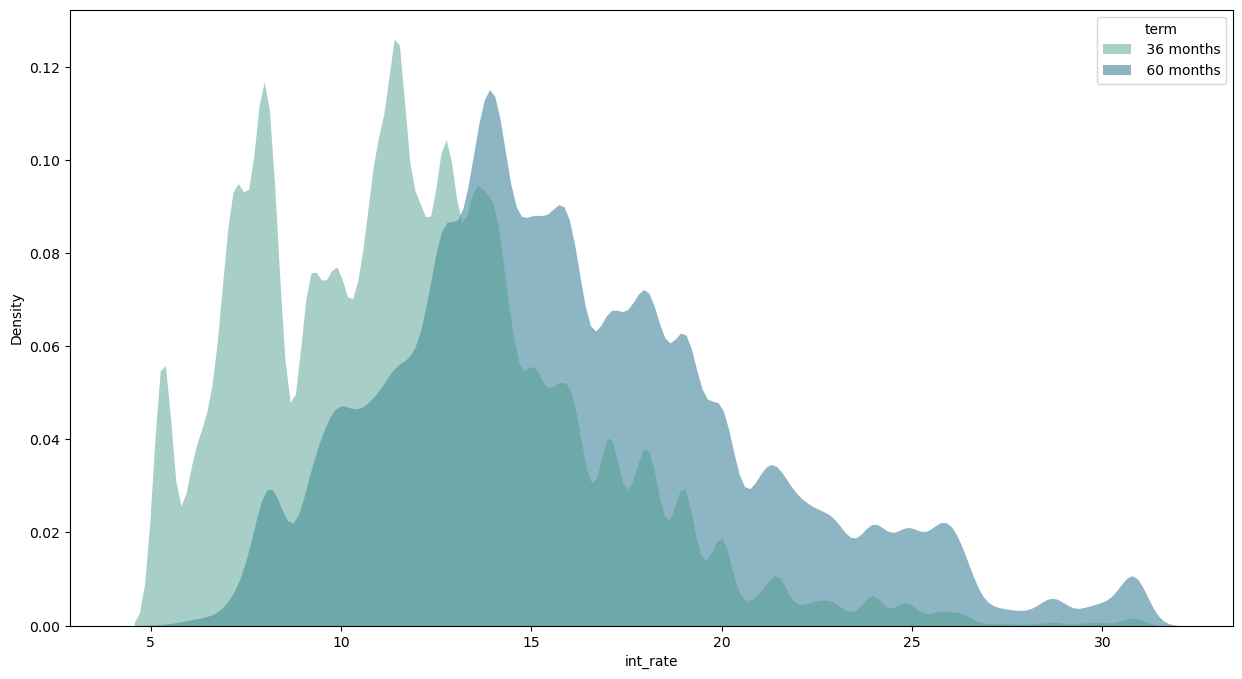

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=train, x="int_rate", hue="term",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

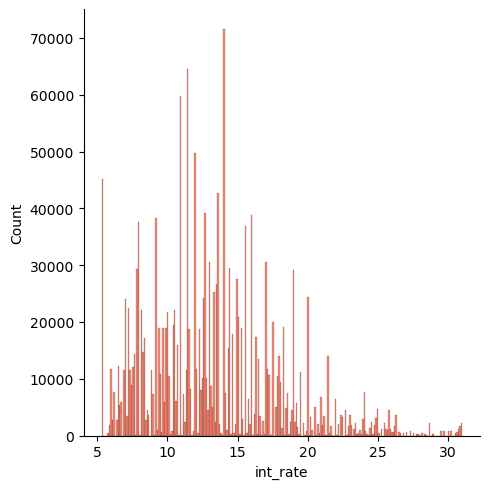

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(train['int_rate'],fill=True,color='tomato')
plt.show()

<Axes: xlabel='int_rate'>

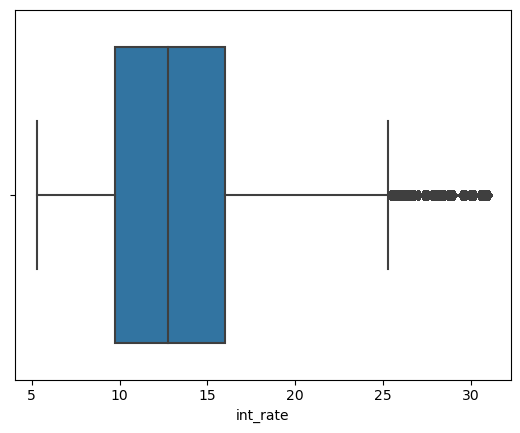

In [ ]:
sns.boxplot(data=train,x='int_rate')

In [ ]:
train.groupby(['grade'])['installment'].count()

grade
A    297850
B    522192
C    523203
D    255378
E    116681
F     38625
G     11497
Name: installment, dtype: int64

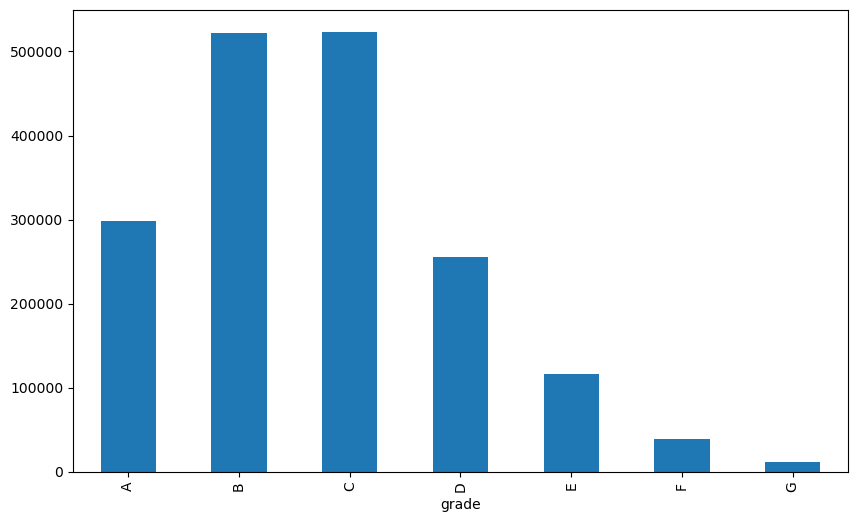

In [ ]:
plt.figure(figsize=(10,6))
(train.groupby('grade').count()['installment']).plot(kind='bar')
plt.show()

In [ ]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'mths_since_last_major_derog', 'application_type', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_w

In [ ]:
train['annual_inc'].value_counts()

60000.00     68257
50000.00     59831
65000.00     50728
70000.00     48392
40000.00     46671
             ...  
203449.67        1
138388.26        1
56479.92         1
83876.00         1
180792.00        1
Name: annual_inc, Length: 77101, dtype: int64

In [ ]:
train['annual_inc'].min(), train['annual_inc'].max()

(0.0, 110000000.0)

In [ ]:
# Define the number of bins
num_bins = 5

# Perform equal frequency binning
binning_annual_inc = pd.DataFrame(pd.qcut(train['annual_inc'], q=num_bins))

binning_annual_inc.value_counts()


annual_inc             
(58000.0, 75000.0]         376695
(42000.0, 58000.0]         364124
(-0.001, 42000.0]          354266
(100000.0, 110000000.0]    341293
(75000.0, 100000.0]        329044
dtype: int64

In [ ]:
# Define bin labels
bin_labels = ['Low', 'Medium_Low', 'Medium_High', 'High','Rich','Super_Rich','Ultra_Rich','Richie_Rich']

# Perform equal frequency binning with custom labels
binning_annual_inc_category = pd.qcut(train['annual_inc'], q=8, labels=bin_labels)

# Print the DataFrame
print(binning_annual_inc_category)

0          Medium_High
1                 High
2                 High
3           Ultra_Rich
4           Ultra_Rich
              ...     
1765421     Ultra_Rich
1765422     Ultra_Rich
1765423    Richie_Rich
1765424     Ultra_Rich
1765425     Ultra_Rich
Name: annual_inc, Length: 1765426, dtype: category
Categories (8, object): ['Low' < 'Medium_Low' < 'Medium_High' < 'High' < 'Rich' < 'Super_Rich' < 'Ultra_Rich' < 'Richie_Rich']


In [ ]:
binning_annual_inc_category.value_counts()

Ultra_Rich     232054
High           231234
Medium_High    229335
Low            224883
Super_Rich     223918
Medium_Low     218319
Richie_Rich    205957
Rich           199722
Name: annual_inc, dtype: int64

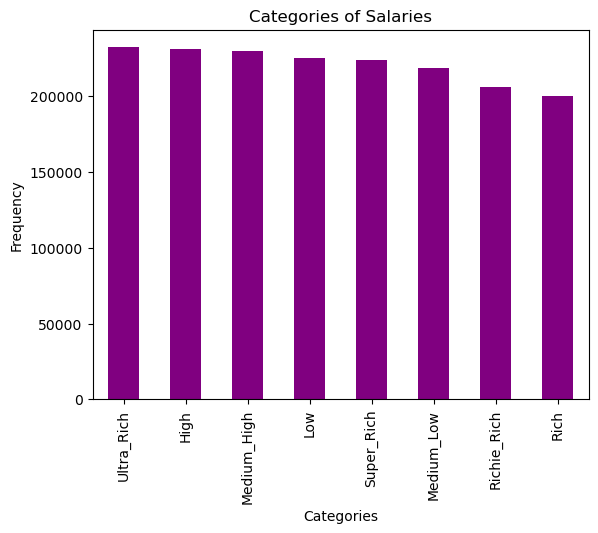

In [ ]:
binning_annual_inc_category.value_counts().plot(kind='bar',color='purple')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Categories of Salaries')
plt.show()

In [ ]:
train['emp_title'].value_counts()[:10]

Teacher             30145
Manager             26290
Owner               16496
Registered Nurse    12234
RN                  11756
Supervisor          11230
Driver              10445
Sales               10131
Project Manager      8656
Office Manager       7553
Name: emp_title, dtype: int64

In [ ]:
train[train['annual_inc'] > 100000][['emp_title', 'title','emp_length']]

emp_title                    title  \
3                    Information Systems Officer       Debt consolidation   
4                            Contract Specialist           Major purchase   
6        Vice President of Recruiting Operations       Debt consolidation   
13                              Software Manager       Debt consolidation   
16                                 Sales Manager       Debt consolidation   
...                                          ...                      ...   
1765419                                  Manager         Medical expenses   
1765420               Current Operations Officer  Credit card refinancing   
1765422                   Database Administrator       Debt consolidation   
1765423                          Vice President                       NaN   
1765424                          Program Manager       Debt consolidation   

        emp_length  
3        10+ years  
4          3 years  
6        10+ years  
13         7 years  
16       10+ years  
...            ...  
1765419  10+ years  
1765420    4 years  
1765422  10+ years  
1765423    9 years  
1765424    6 years  

[341293 rows x 3 columns]

In [ ]:
pd.crosstab(train['annual_inc'] > 100000,train['emp_length'])

emp_length  1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
annual_inc                                                                   
False        95248     449821   129677   114238    85602    88557    65171   
True         19988     137802    29253    25886    19741    20287    15480   

emp_length  7 years  8 years  9 years  < 1 year  
annual_inc                                       
False         60479    61037    53523    121294  
True          14255    14850    13250     25067

<Axes: xlabel='emp_length', ylabel='annual_inc'>

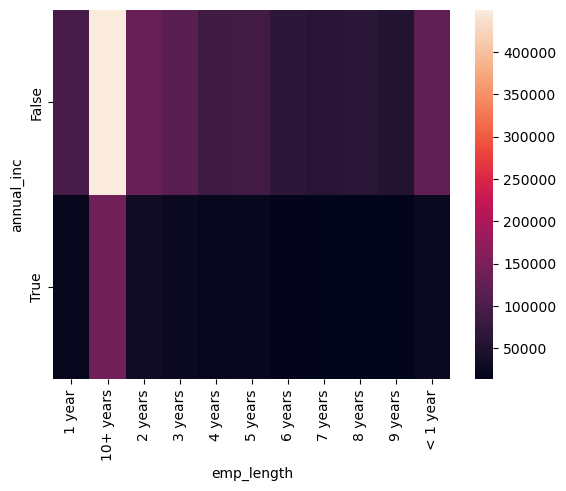

In [ ]:
sns.heatmap(pd.crosstab(train['annual_inc'] > 100000,train['emp_length']))

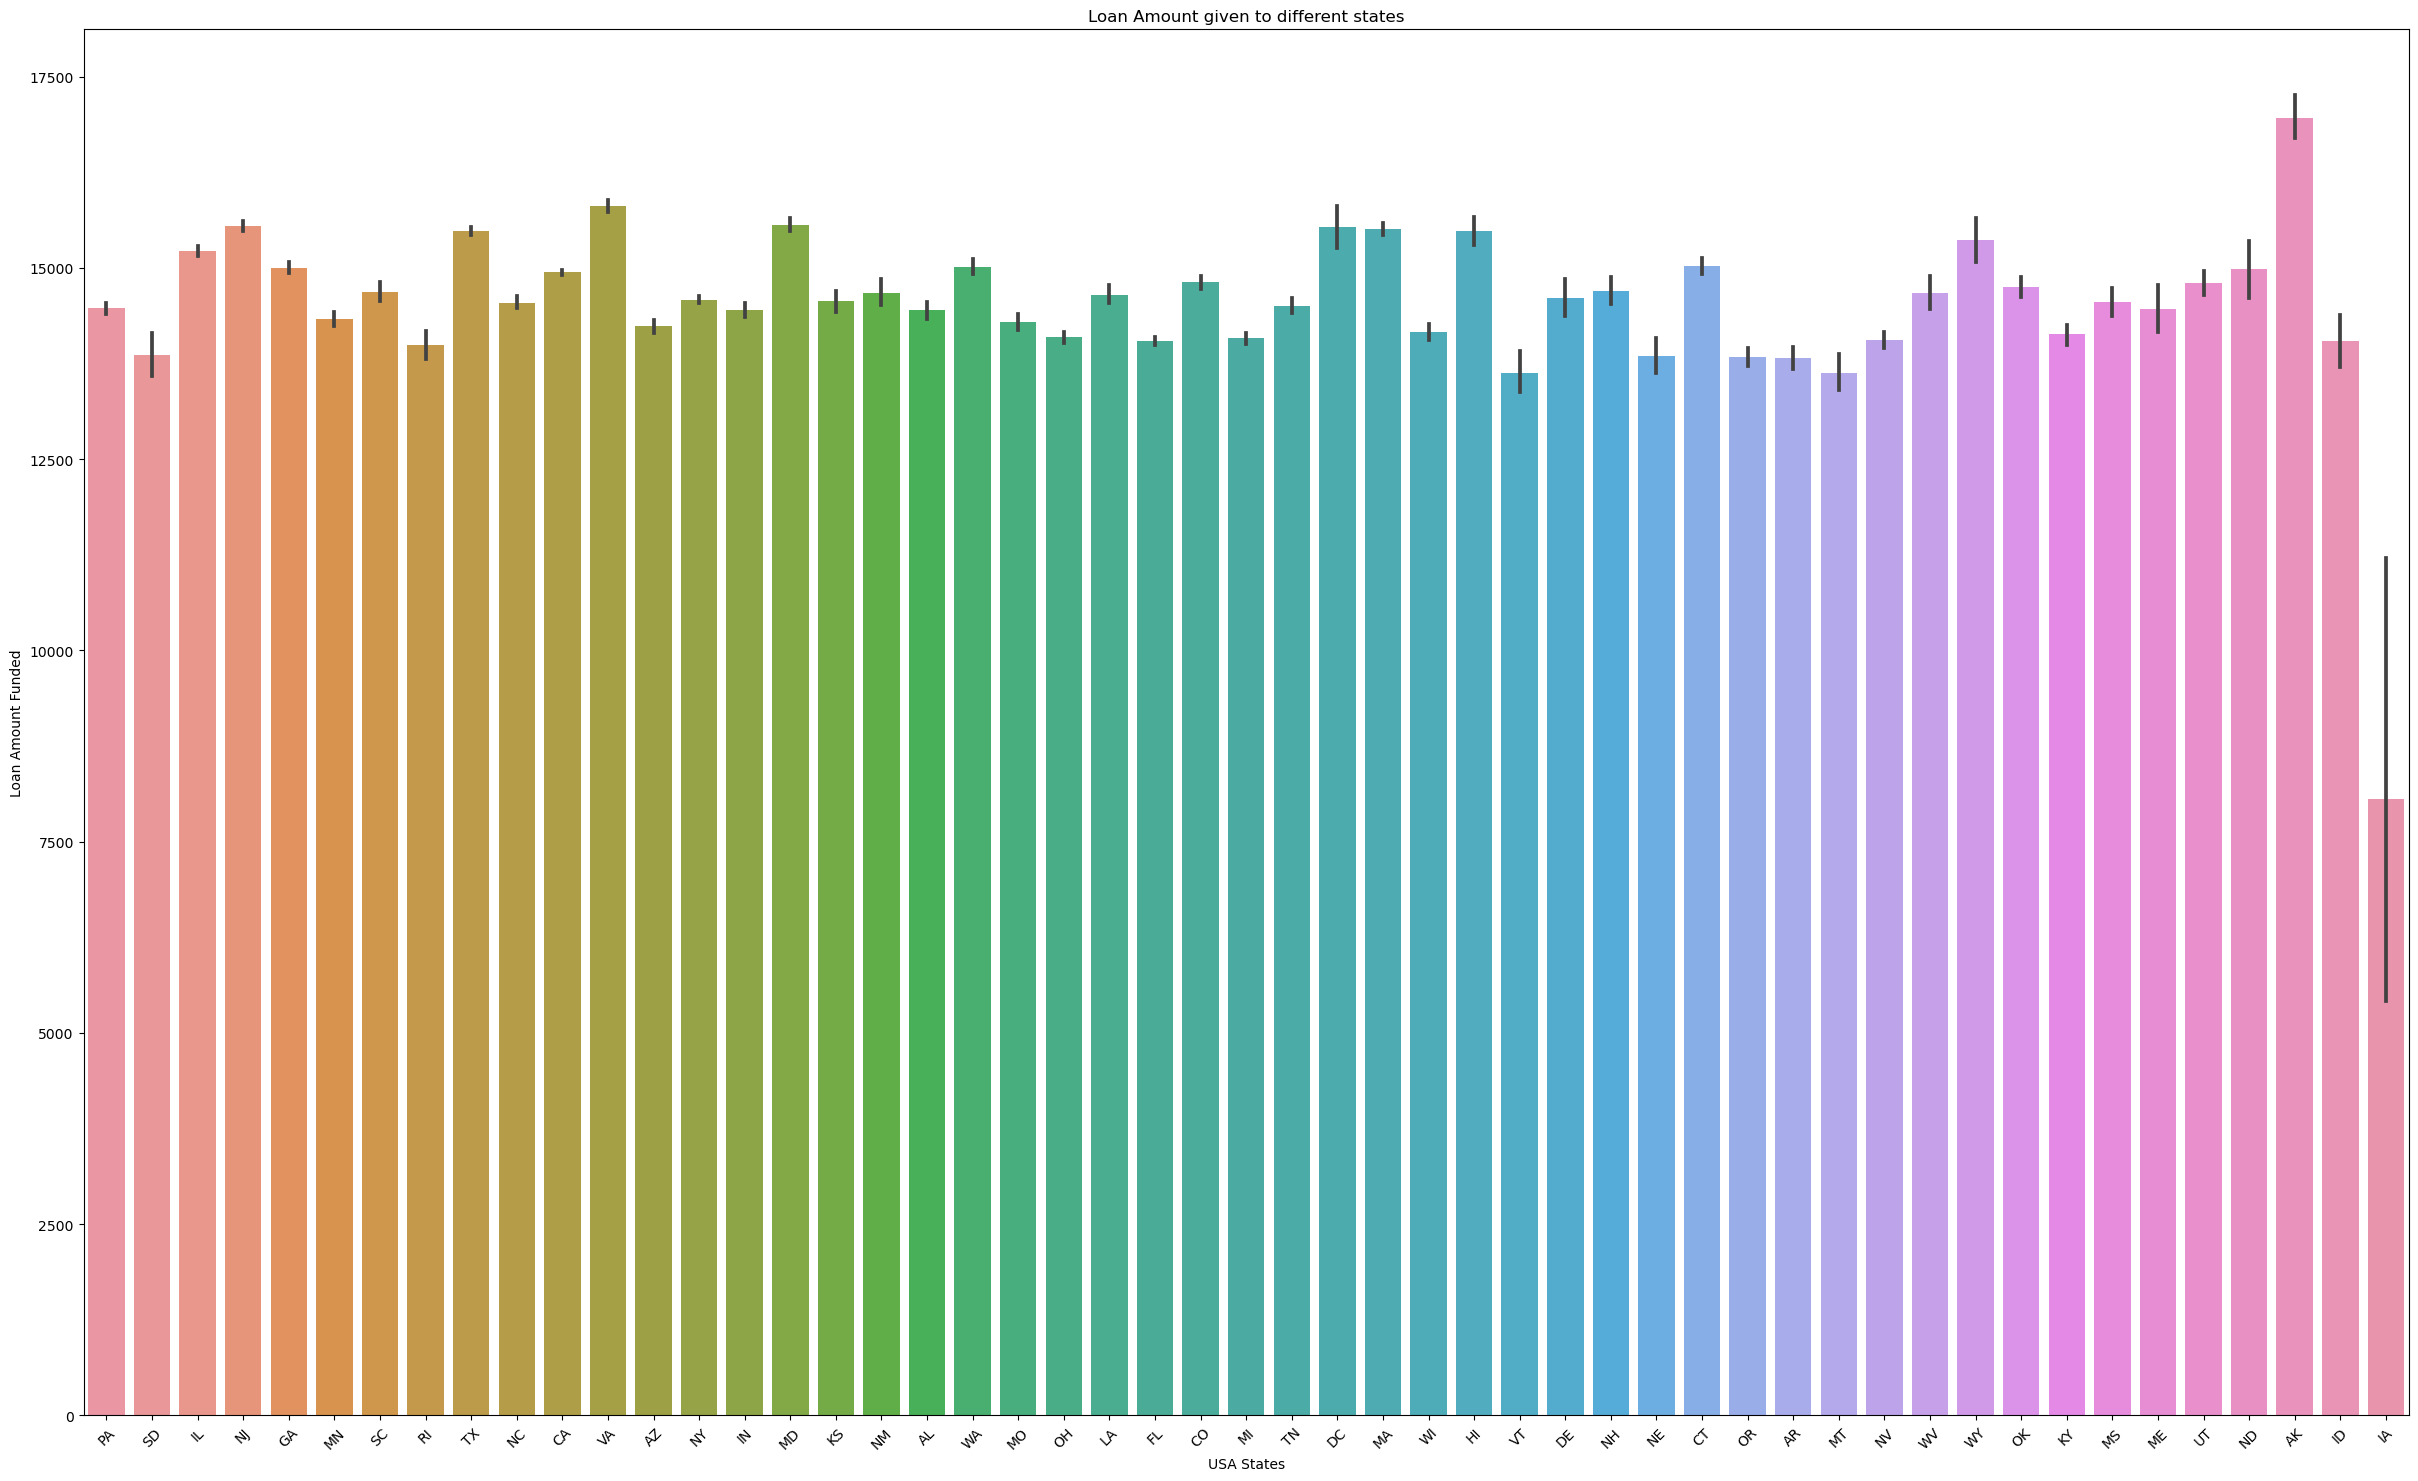

In [ ]:
plt.figure(figsize=(30,18))
sns.barplot(x=train['addr_state'],y=train['funded_amnt'])
plt.xlabel('USA States')
plt.ylabel('Loan Amount Funded')
plt.title('Loan Amount given to different states')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['loan_status'].value_counts()

Fully Paid                                             1029307
Current                                                 451136
Charged Off                                             259692
Late (31-120 days)                                       14246
In Grace Period                                           5517
Late (16-30 days)                                         2746
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     33
Name: loan_status, dtype: int64

In [ ]:
train['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count',
    width=500, height=500,rot=45,
)

:Bars   [index]   (loan_status)

In [ ]:
#Loan Amount has to have correlation with other features

def plot_bivariate_hvplot_hist(col1,col2):
    c1 = train.hvplot.hist(
        y=col1, by='loan_status', subplots=False,
        width=350, height=400, bins=50, alpha=0.4,
        title=f"{col1} by Loan Status",
        xlabel=col1, ylabel='Counts', legend='top'
    )
    c2 = train.hvplot.hist(
        y=col2, by='loan_status', subplots=False,
        width=350, height=400, bins=50, alpha=0.4,
        title=f"{col2} by Loan Status",
        xlabel=col2, ylabel='Counts', legend='top'
    )

    return c1+c2


plot_bivariate_hvplot_hist('int_rate','funded_amnt')


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [funded_amnt]   (funded_amnt_count)

In [ ]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'mths_since_last_major_derog', 'application_type', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_w

In [ ]:
train['home_ownership'].value_counts()

MORTGAGE    872230
RENT        699523
OWN         192929
ANY            508
OTHER          182
NONE            54
Name: home_ownership, dtype: int64

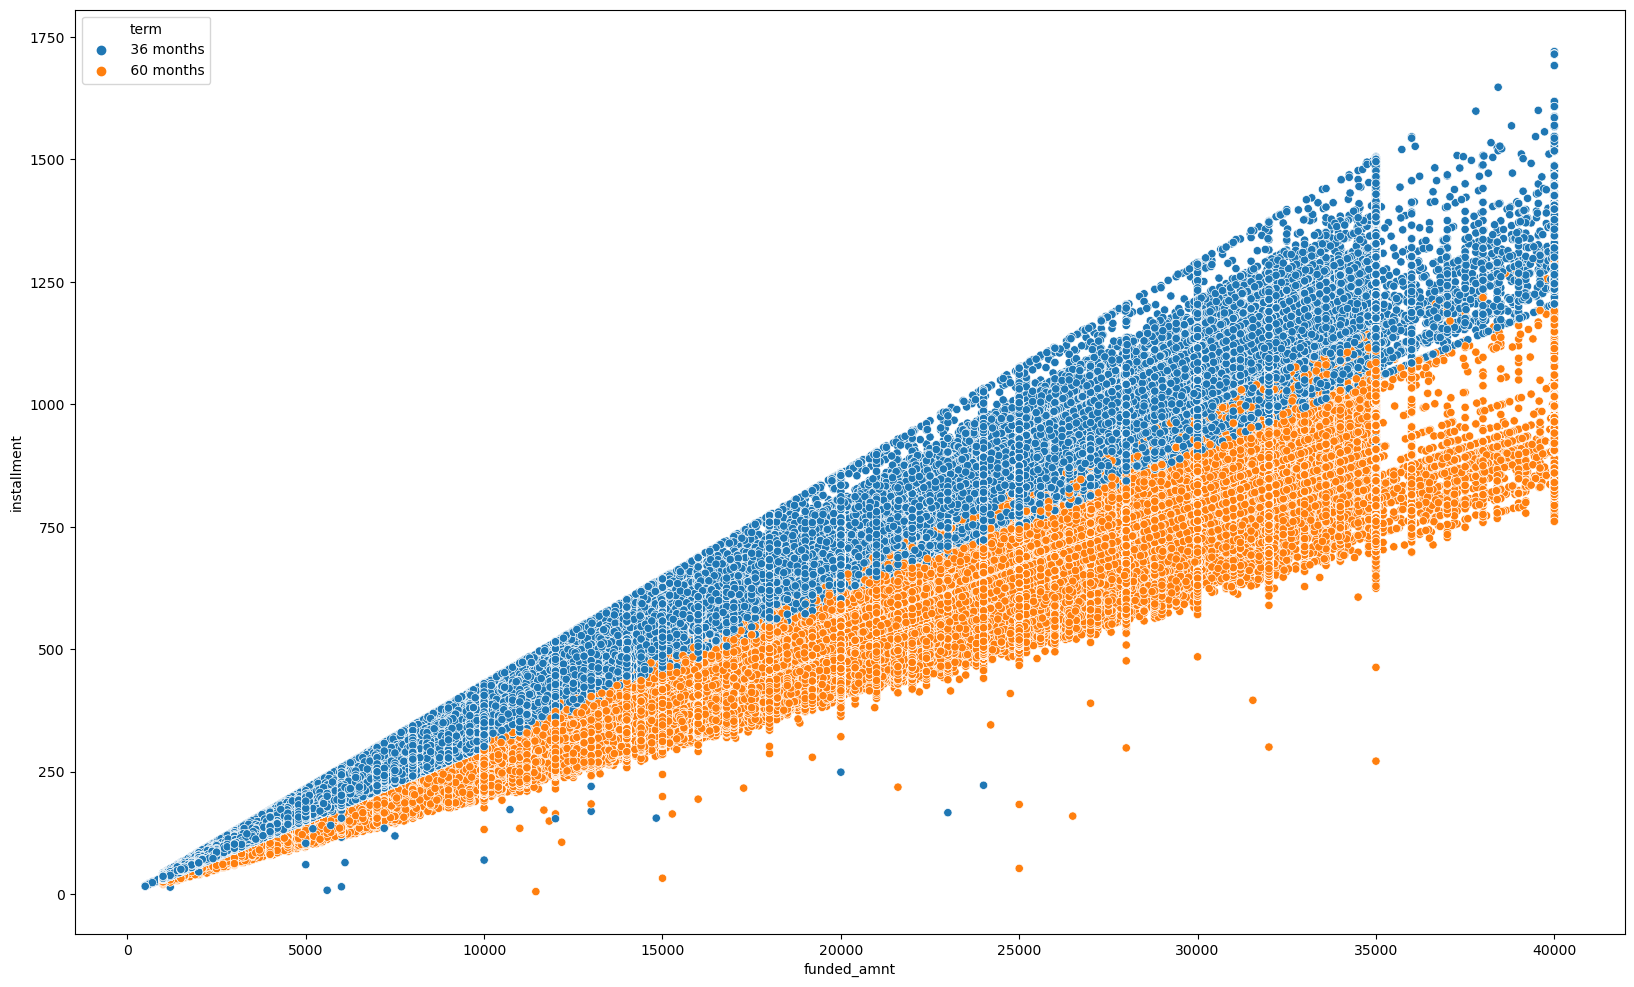

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=train['funded_amnt'],y=train['installment'],hue=train['term'])
plt.show()

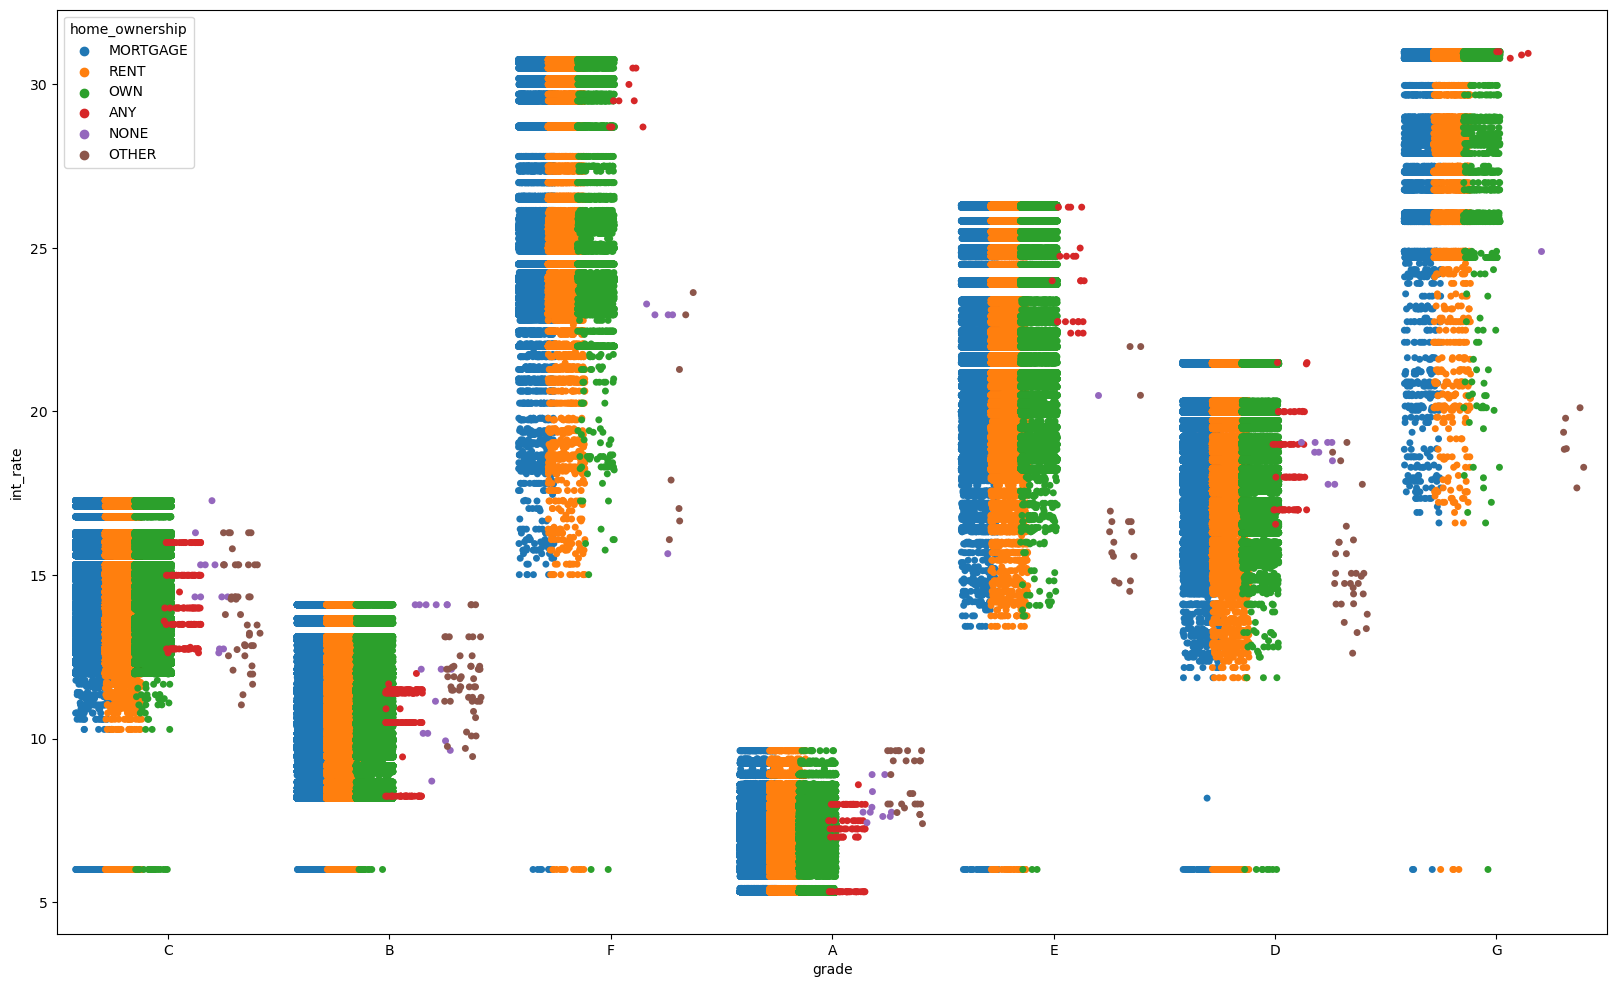

In [ ]:
plt.figure(figsize=(20,12))
sns.stripplot(x=train['grade'],
              y=train['int_rate'],
              hue=train['home_ownership'],
              jitter=0.5,
              dodge=True)
plt.show()

In [ ]:
train['verification_status'].value_counts()

Source Verified    689884
Not Verified       544872
Verified           530670
Name: verification_status, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x1800 with 0 Axes>

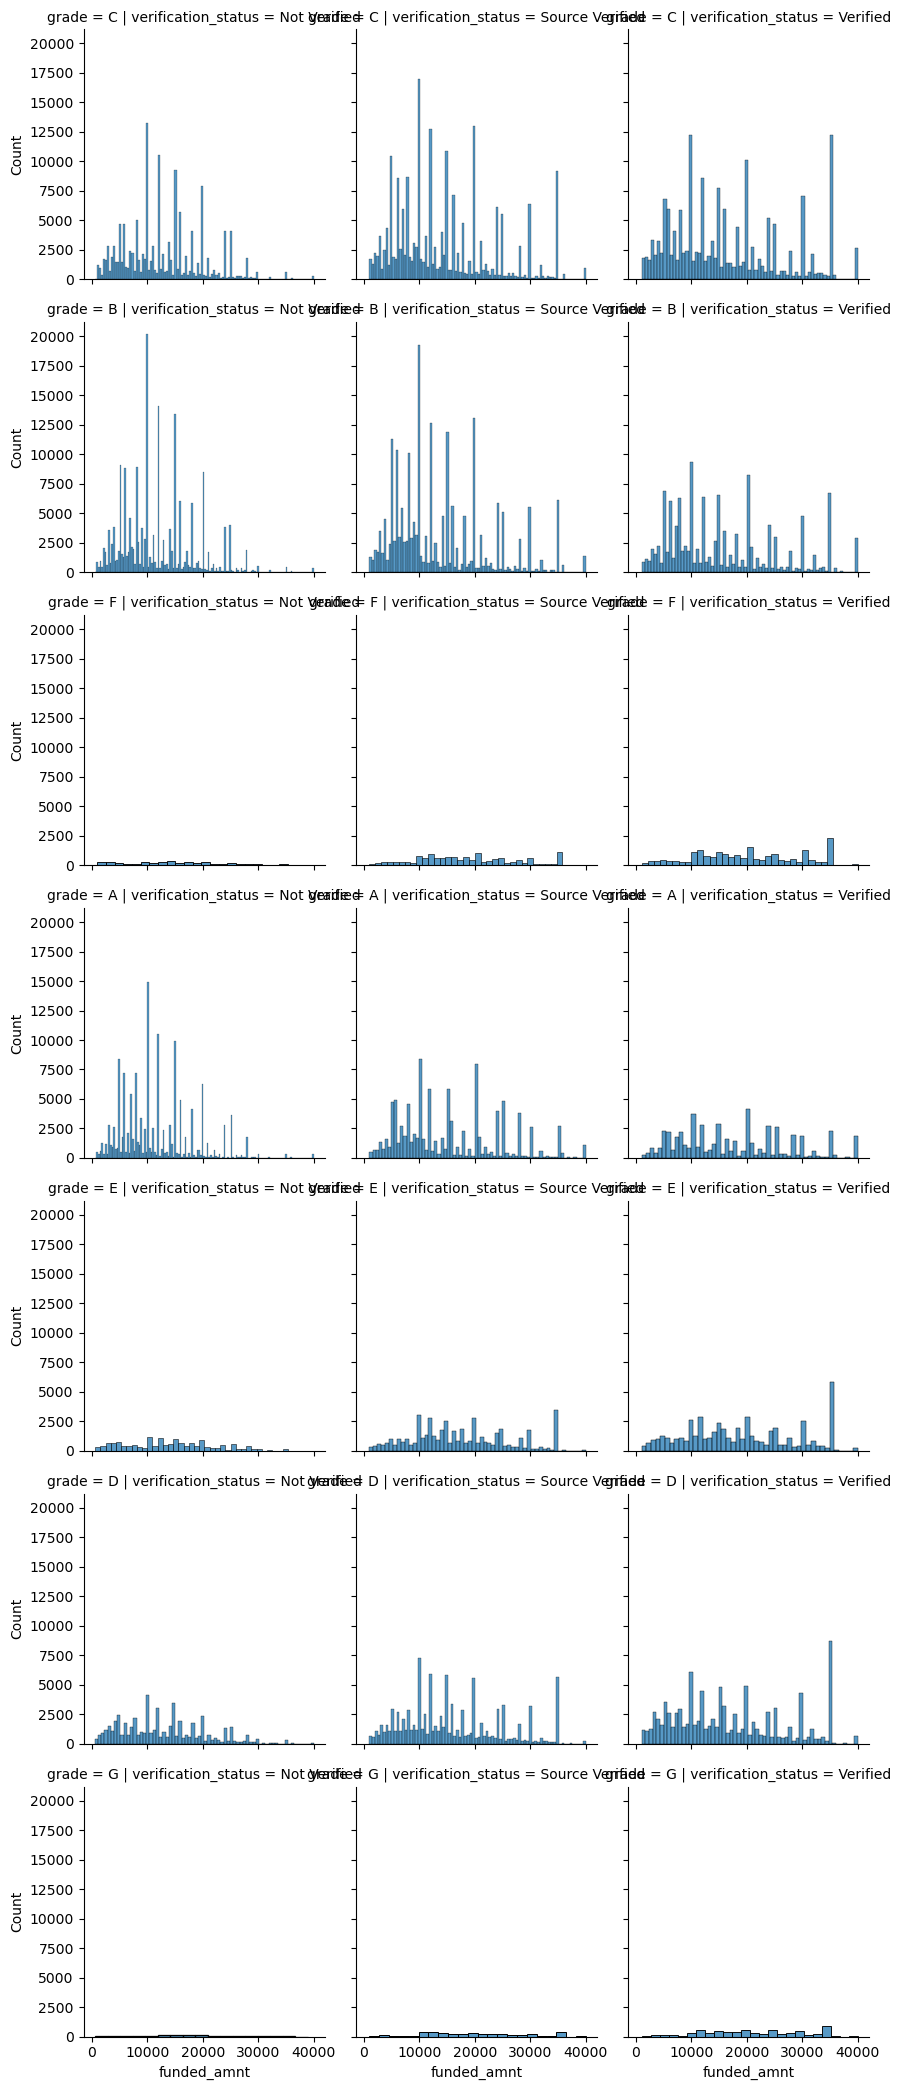

In [ ]:
plt.figure(figsize=(30,18))
g = sns.FacetGrid(train, col="verification_status",  row="grade")
g.map_dataframe(sns.histplot, x="funded_amnt")
plt.show()

In [ ]:
train['purpose'].value_counts()

debt_consolidation    1018235
credit_card            389269
home_improvement       117709
other                  104422
major_purchase          38823
medical                 20866
small_business          20106
car                     19034
moving                  12288
vacation                12024
house                    8706
wedding                  2350
renewable_energy         1170
educational               424
Name: purpose, dtype: int64

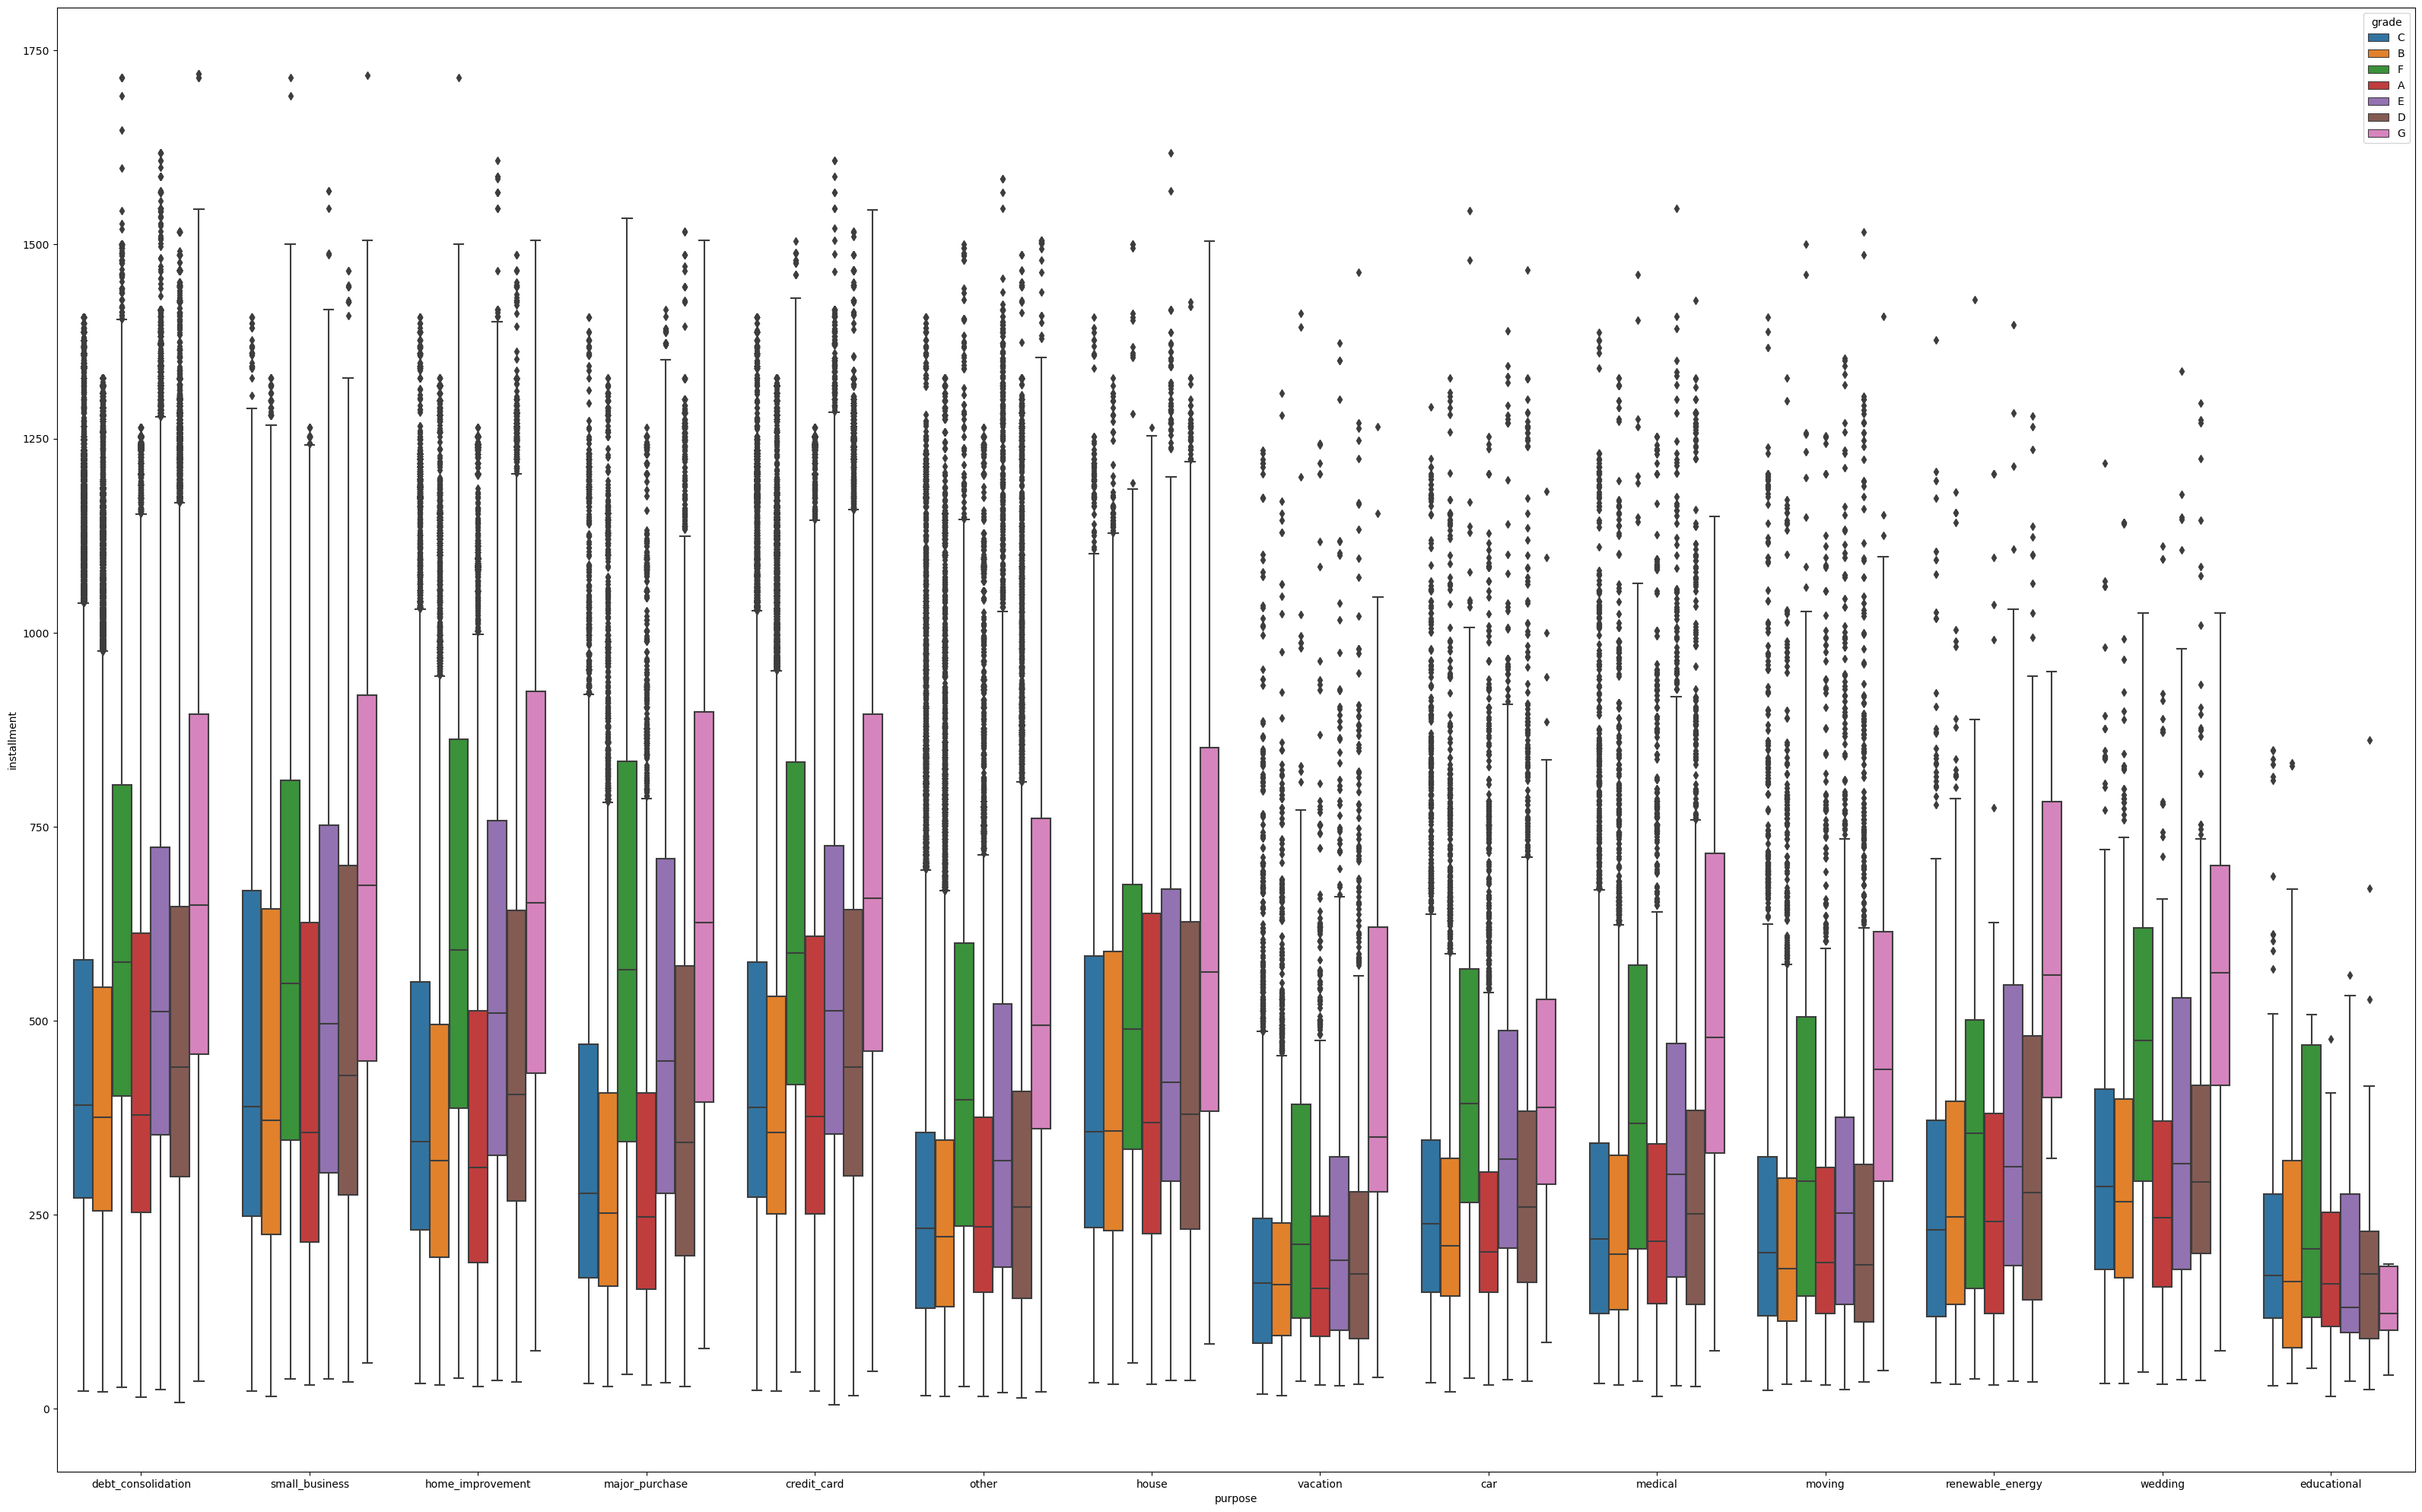

In [ ]:
plt.figure(figsize=(40,25))
sns.boxplot(x=train['purpose'],
            y=train['installment'],
            hue=train['grade'],
           dodge=True)
plt.show()

<Axes: xlabel='annual_inc', ylabel='funded_amnt'>

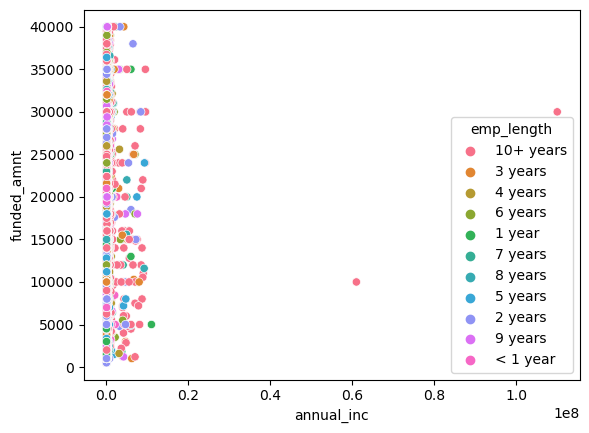

In [ ]:
sns.scatterplot(x=train['annual_inc'],y=train['funded_amnt'],hue=train['emp_length'])

<Axes: ylabel='home_ownership'>

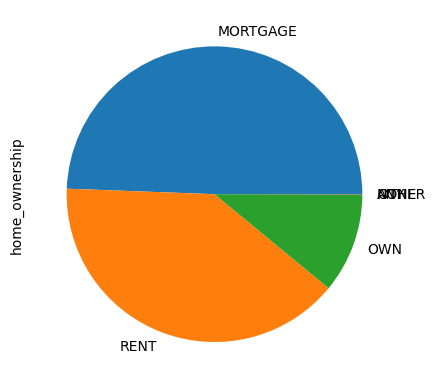

In [ ]:
train['home_ownership'].value_counts().plot(kind='pie')

In [ ]:
fully_paid = train.loc[train['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar()
charged_off = train.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [ ]:
grade = list(train['grade'].unique())
grade

['C', 'B', 'F', 'A', 'E', 'D', 'G']

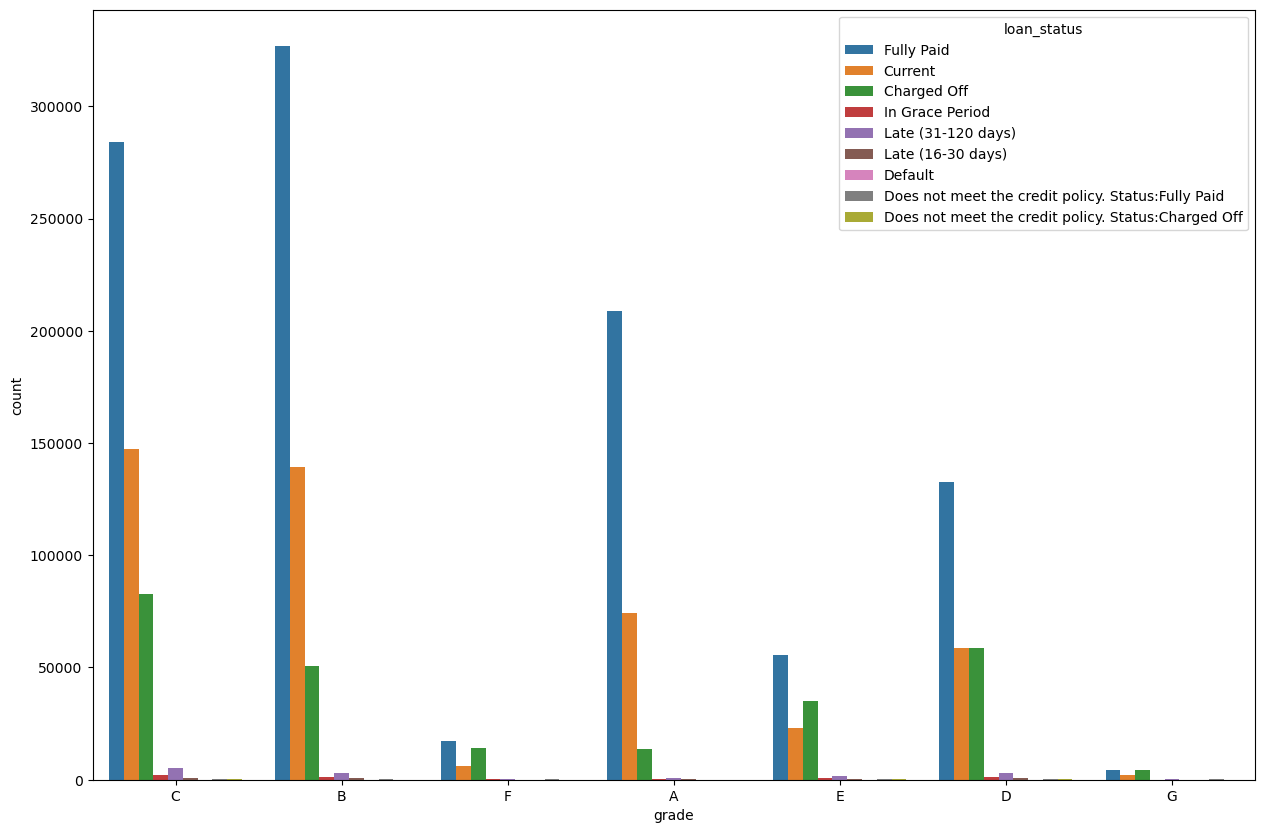

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='grade', data=train, hue='loan_status', order=grade)
plt.show()

<Axes: xlabel='sub_grade', ylabel='count'>

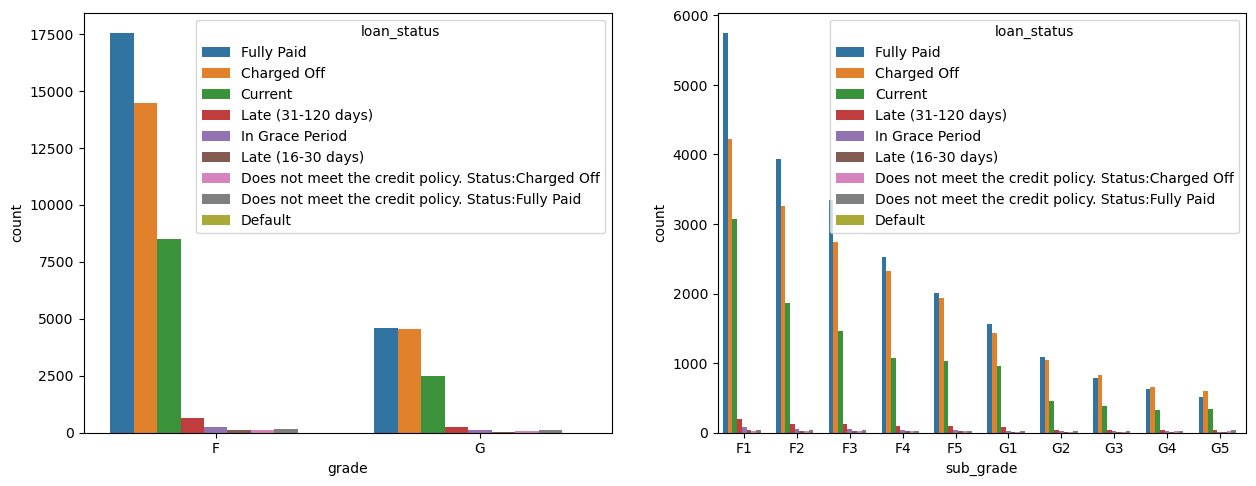

In [ ]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [ ]:
charged_off = train.loc[train['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

In [ ]:
fully_paid = train.loc[train['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar()
charged_off = train.loc[train['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

#1,2,1
home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

#1,2,2
home_ownership = train.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend='top'
).opts(xrotation=45)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Home_ownership :Overlay
      .Bars.Home_ownership.I  :Bars   [index]   (home_ownership)
      .Bars.Home_ownership.II :Bars   [index]   (home_ownership)
   .Bars.Home_ownership    :Bars   [index]   (home_ownership)

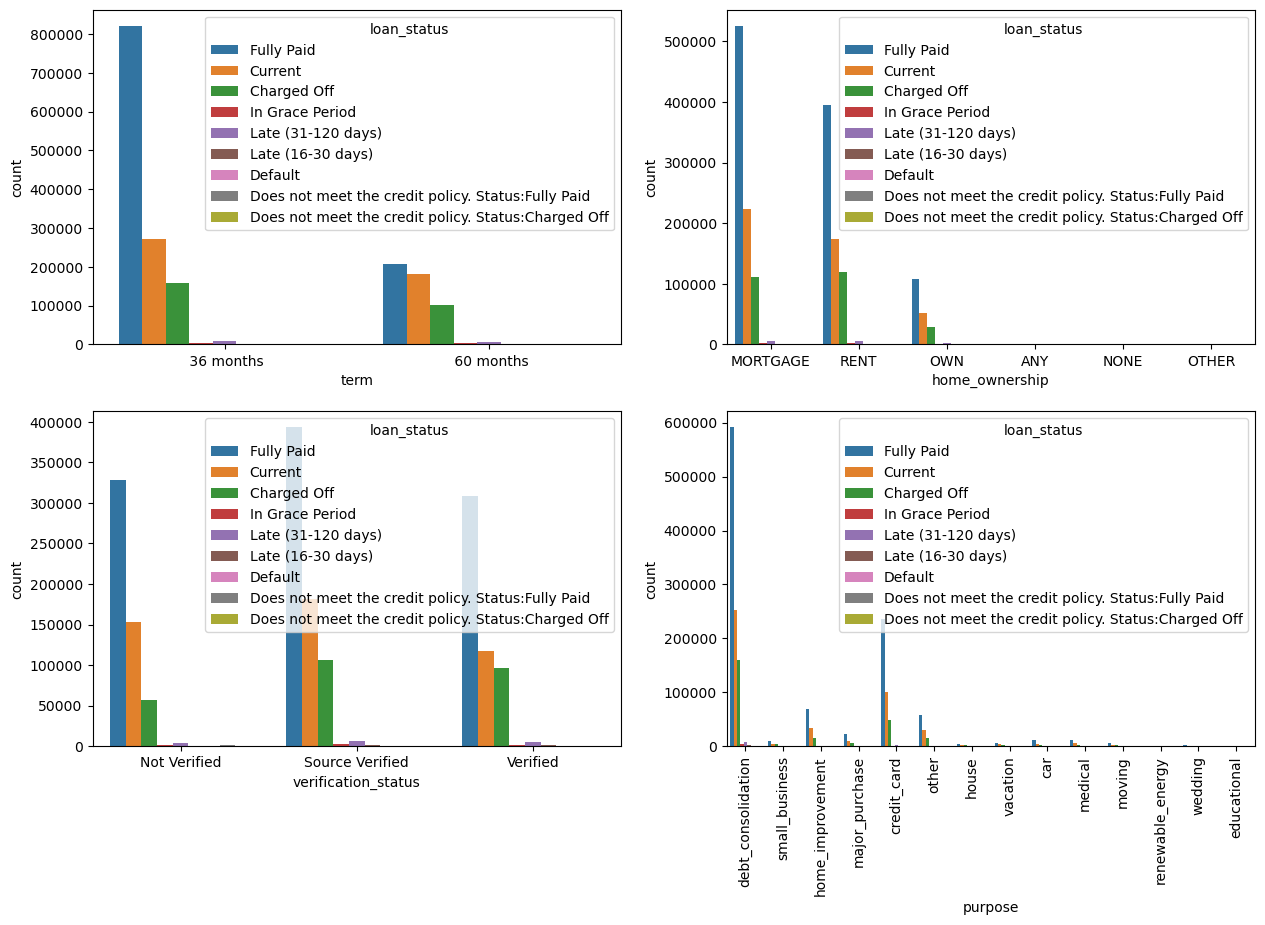

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=train, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=train, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=train, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=train, hue='loan_status')

g.set_xticklabels(g.get_xticklabels(), rotation=90);

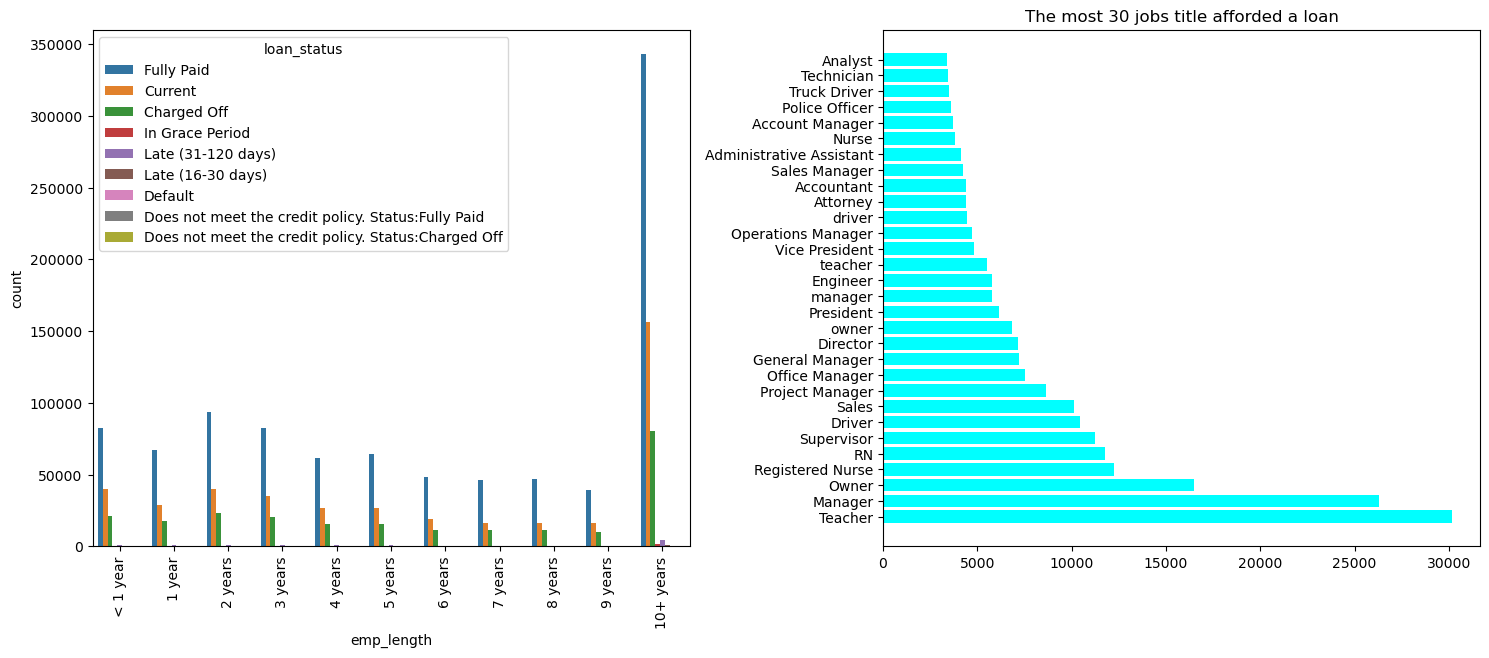

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=train, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(train.emp_title.value_counts()[:30].index, train.emp_title.value_counts()[:30],color='cyan')
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

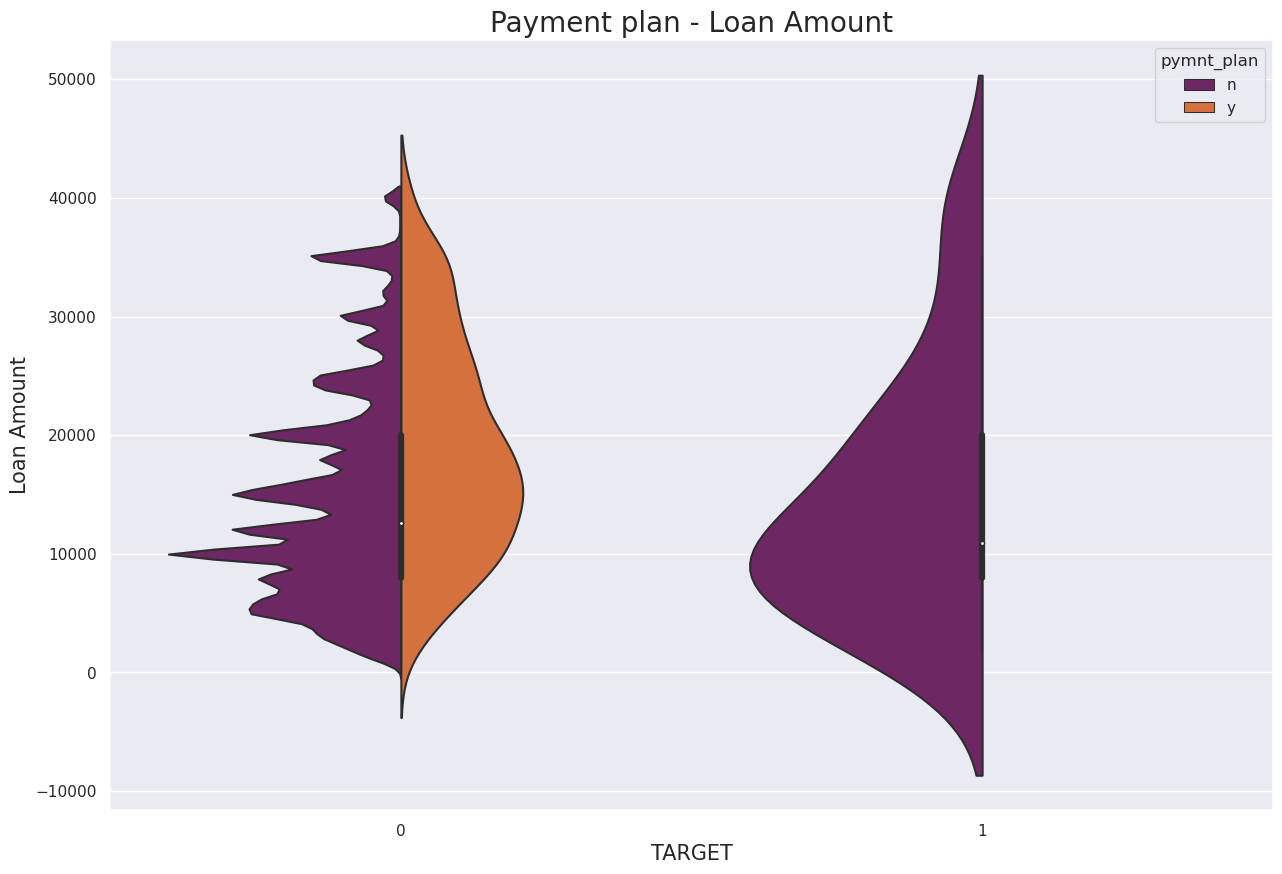

In [ ]:
target = [1 if i=='Default' else 0 for i in train['loan_status']]
train['target'] = target
train['target'].value_counts()

sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="target",y="funded_amnt",data=train, hue="pymnt_plan", split=True,palette='inferno')
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);
#As expected, people who have defaulted their loans had no payment plan

<Axes: xlabel='emp_length', ylabel='count'>

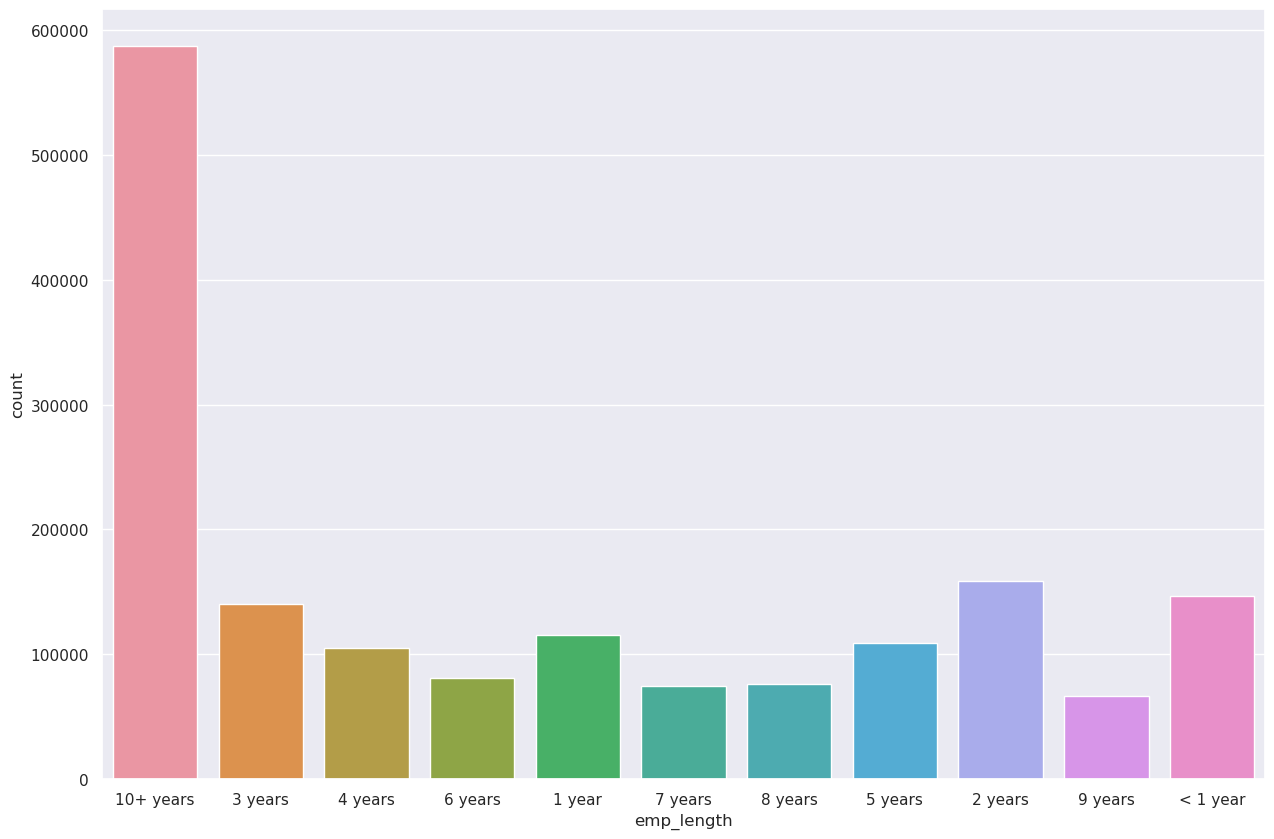

In [ ]:
sns.countplot(x ='emp_length',data=train)

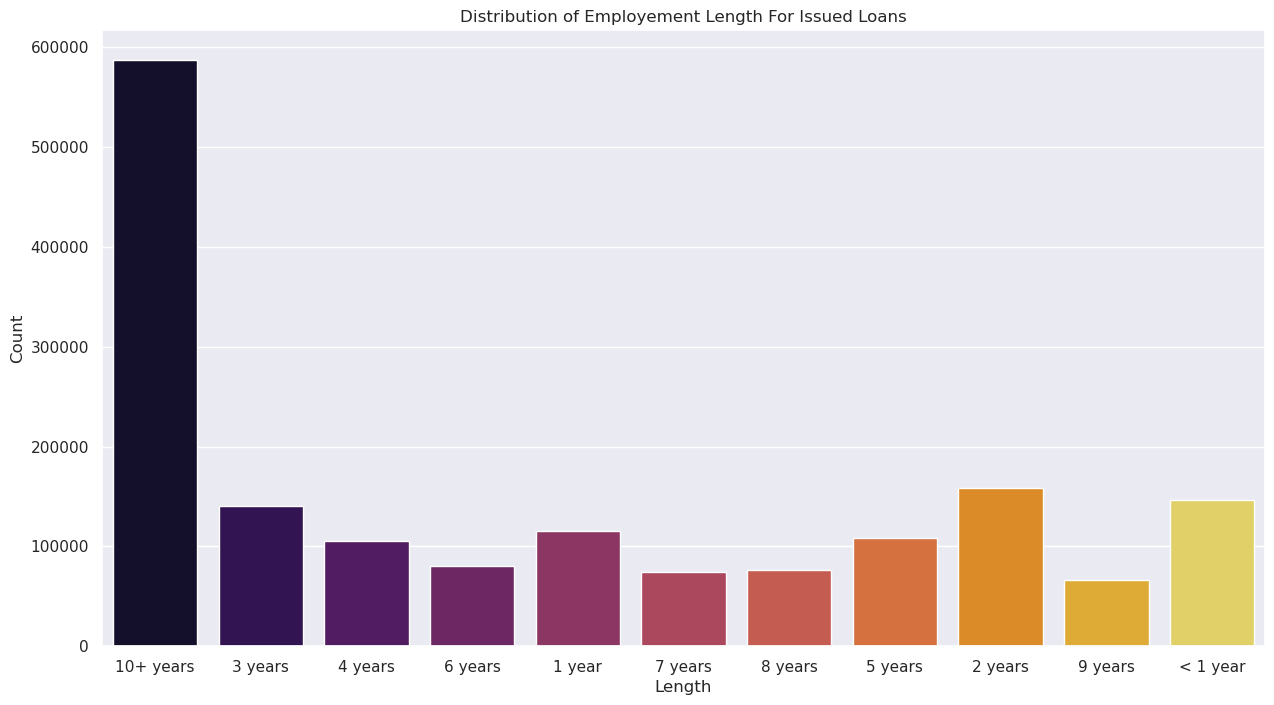

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x ='emp_length',data=train,palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

<Axes: xlabel='grade', ylabel='count'>

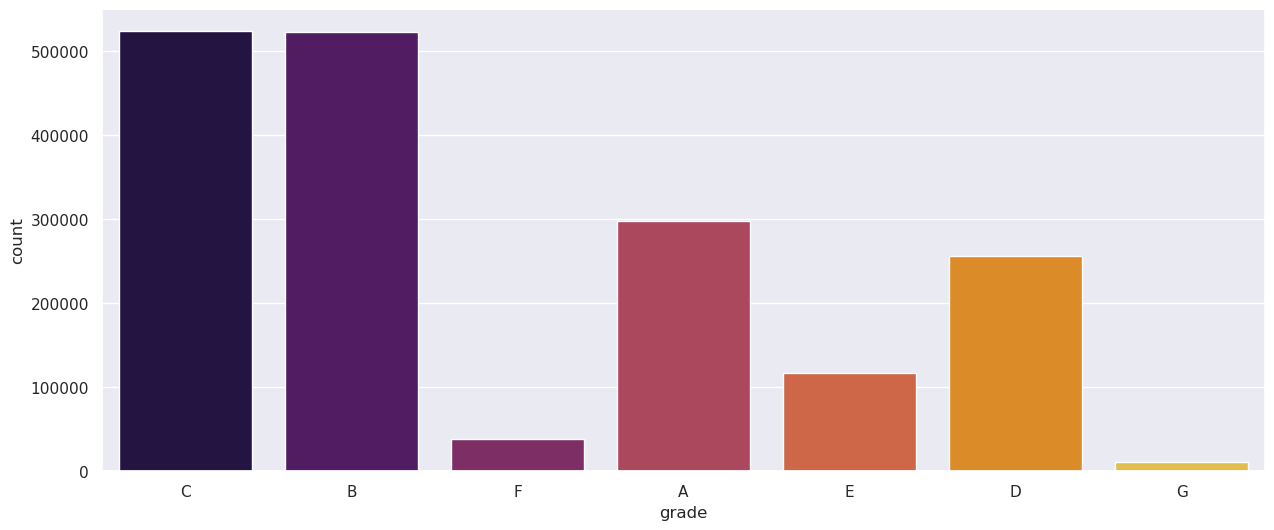

In [ ]:

sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(data=train,x='grade', palette='inferno')

/tmp/ipykernel_33/2068417241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_grades = train.groupby("grade").mean().reset_index()


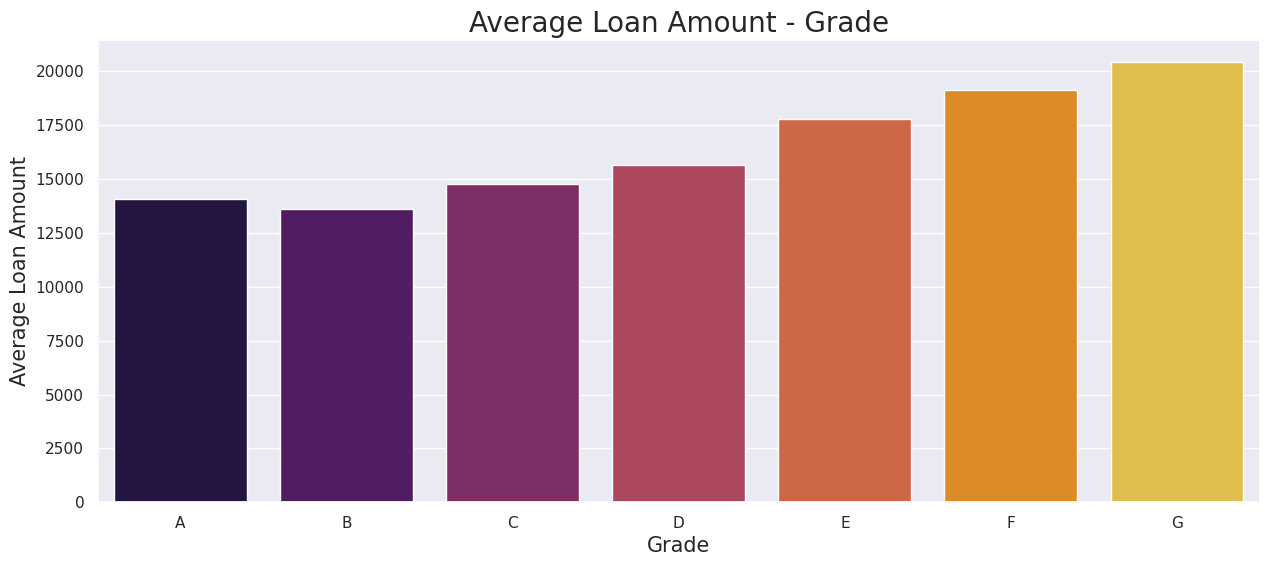

In [ ]:
loan_grades = train.groupby("grade").mean().reset_index()

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

In [ ]:
#Average loan amount of B grade loans is the least of all grades. I guess the higher the grade, lower the loan amount is issued

#We should have a look at the interest rates offered for these loan grades.

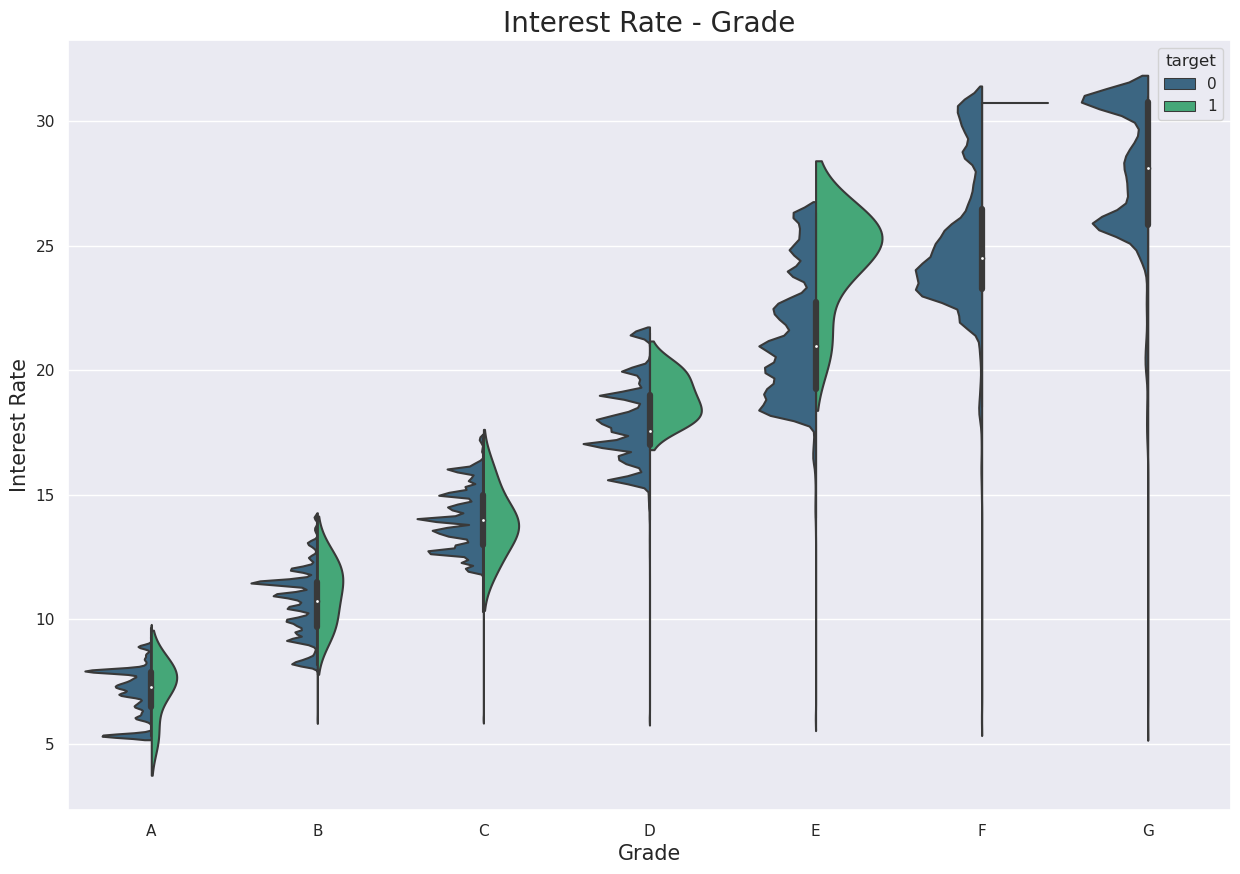

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="grade", y="int_rate", data=train, palette='viridis', order="ABCDEFG",hue='target',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);
#I think my previous assumption was right. The higher the loan amount, higher the interest rate.

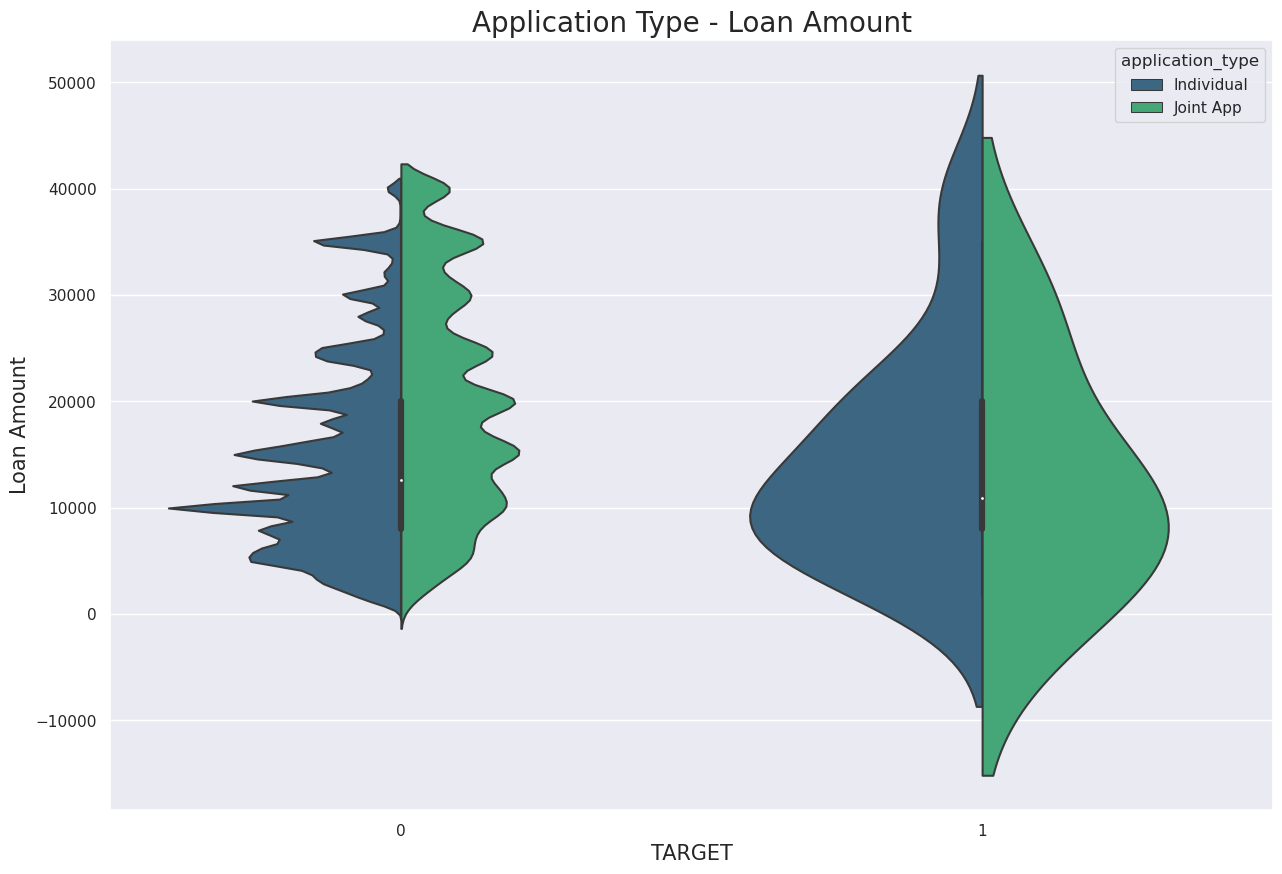

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="target",y="loan_amnt",data=train, hue="application_type", split=True,palette='viridis')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [ ]:
#So most of the defaulted loans were issued to individuals. Two or more people who take loans have lower chances of defaulting

#Let us see the overall distribution of interest rates now.

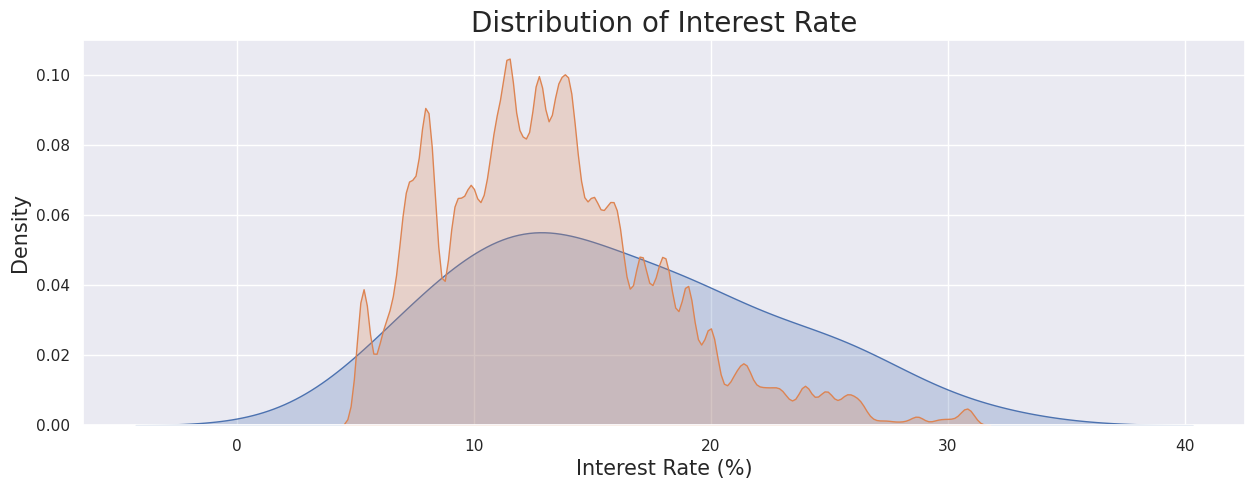

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(train.loc[train['target'] == 1, 'int_rate'], label = 'target = 1',fill=True)
sns.kdeplot(train.loc[train['target'] == 0, 'int_rate'], label = 'target = 0',fill=True);
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);
plt.show()

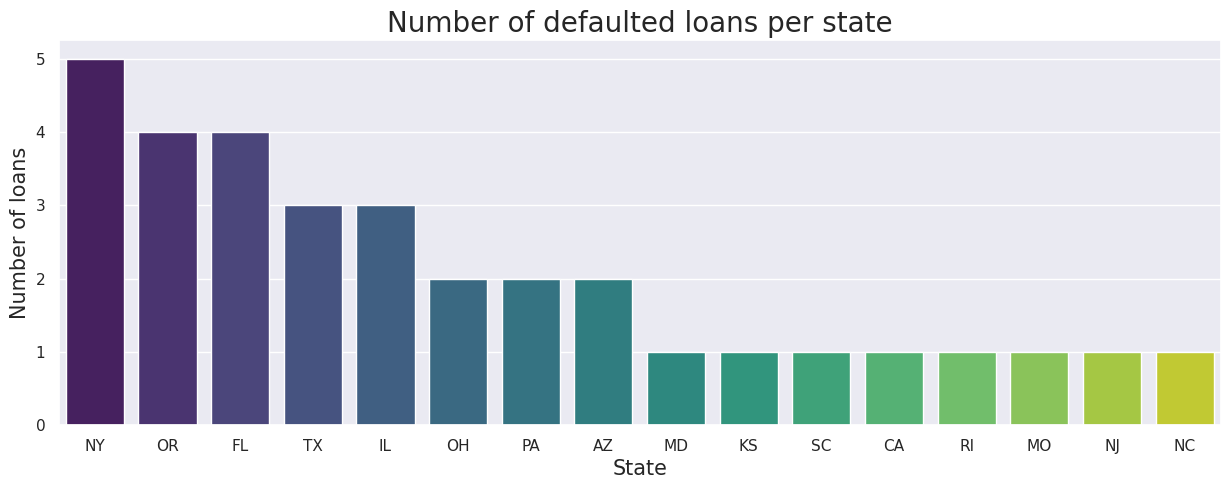

In [ ]:
#To which state most of the defaulted loan cases belong?
state_default = train[train['target']==1]['addr_state']
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=state_default, order=state_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);


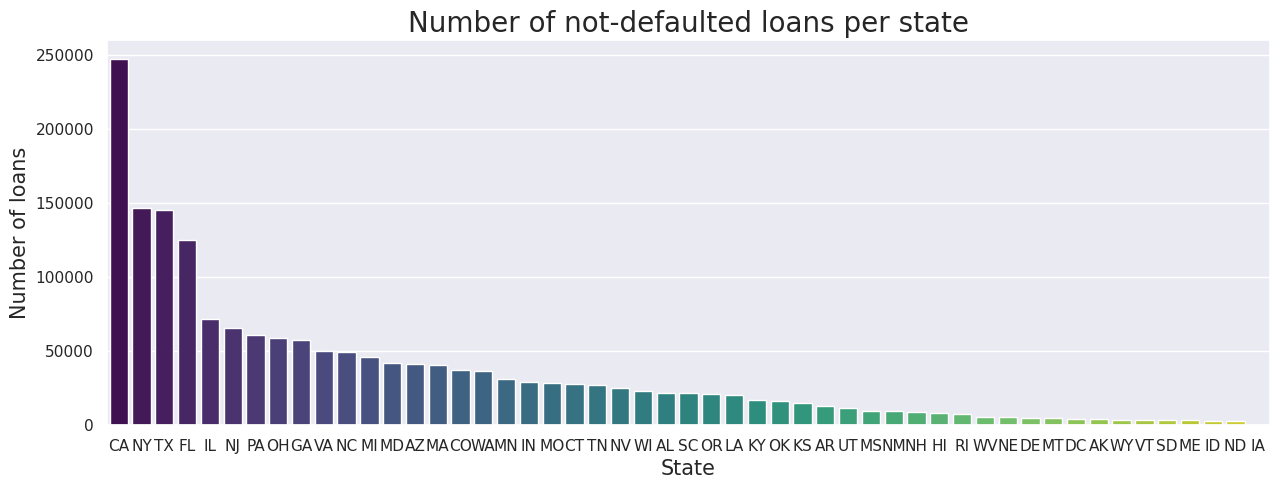

In [ ]:
state_non_default = train[train['target']==0]['addr_state']

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=state_non_default, order=state_non_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of not-defaulted loans per state',fontsize=20);

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

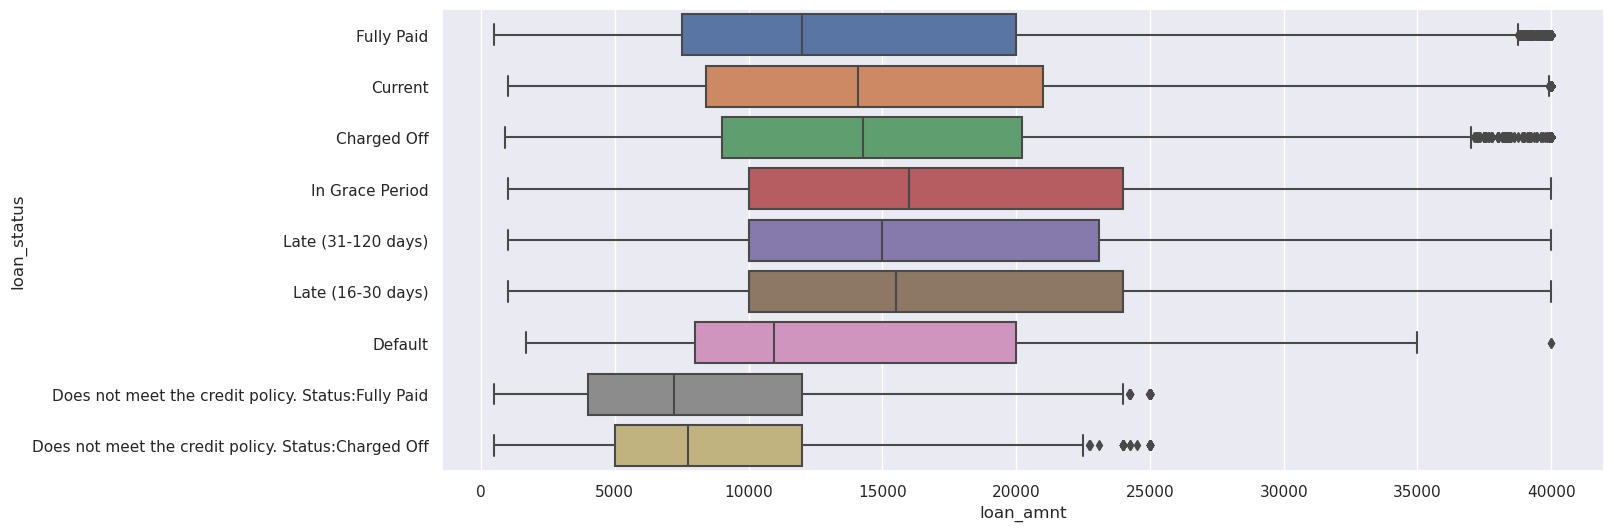

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_amnt', y='loan_status', data=train)

In [ ]:
#train.hvplot.line(x='issue_d', y='loan_status')
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [ ]:
fully_paid = train.loc[train['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35)
fully_paid

:Histogram   [issue_d]   (issue_d_count)

In [ ]:
charged_off = train.loc[train['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)
charged_off

:Histogram   [issue_d]   (issue_d_count)

In [ ]:
data['earliest_cr_line'].isna().sum()

62

In [ ]:
data['issue_d'].isna().sum()

33

In [ ]:
fully_paid = train.loc[train['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35)
charged_off = train.loc[train['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status by Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_left'
).opts(xrotation=45)

# fully_paid = train.loc[train['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35)
# charged_off = train.loc[train['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

# earliest_cr_line = (fully_paid * charged_off).opts(
#     title="Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
#     width=350, height=350, legend_cols=2, legend_position='top_right'
# ).opts(xrotation=45)

loan_issue_date #+ earliest_cr_line

:Overlay
   .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
   .Histogram.II :Histogram   [issue_d]   (issue_d_count)

In [ ]:
dti = train[train['dti']<=50].hvplot.hist( #small dti, less likely loan will be paid
    y='dti', by='loan_status', bins=50, width=300, height=350,
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count',
    alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"
open_acc = train.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350,
    title=title, xlabel='The number of open credit lines', ylabel='Count',
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = train.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350,
    title=title, xlabel='The total number of credit lines', ylabel='Count',
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [ ]:
title="Loan Status by Revolving line utilization rate"

revol_util = train.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Revolving line utilization rate', ylabel='Count',
    alpha=0.4, legend='top'
)

title="Loan Status by Revolving line utilization rate (<120)"

sub_revol_util = train[train.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400,
    title=title, xlabel='Revolving line utilization rate', ylabel='Count',
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [ ]:
fully_paid = train.loc[train['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar()
charged_off = train.loc[train['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Application_type.I  :Bars   [index]   (application_type)
   .Bars.Application_type.II :Bars   [index]   (application_type)

In [ ]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = train.loc[train['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()
charged_off = train.loc[train['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec_bankruptcies.I  :Bars   [index]   (pub_rec_bankruptcies)
   .Bars.Pub_rec_bankruptcies.II :Bars   [index]   (pub_rec_bankruptcies)

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [ ]:
data['pub_rec'] = train.pub_rec.apply(pub_rec)
data['mort_acc'] = train.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = train.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

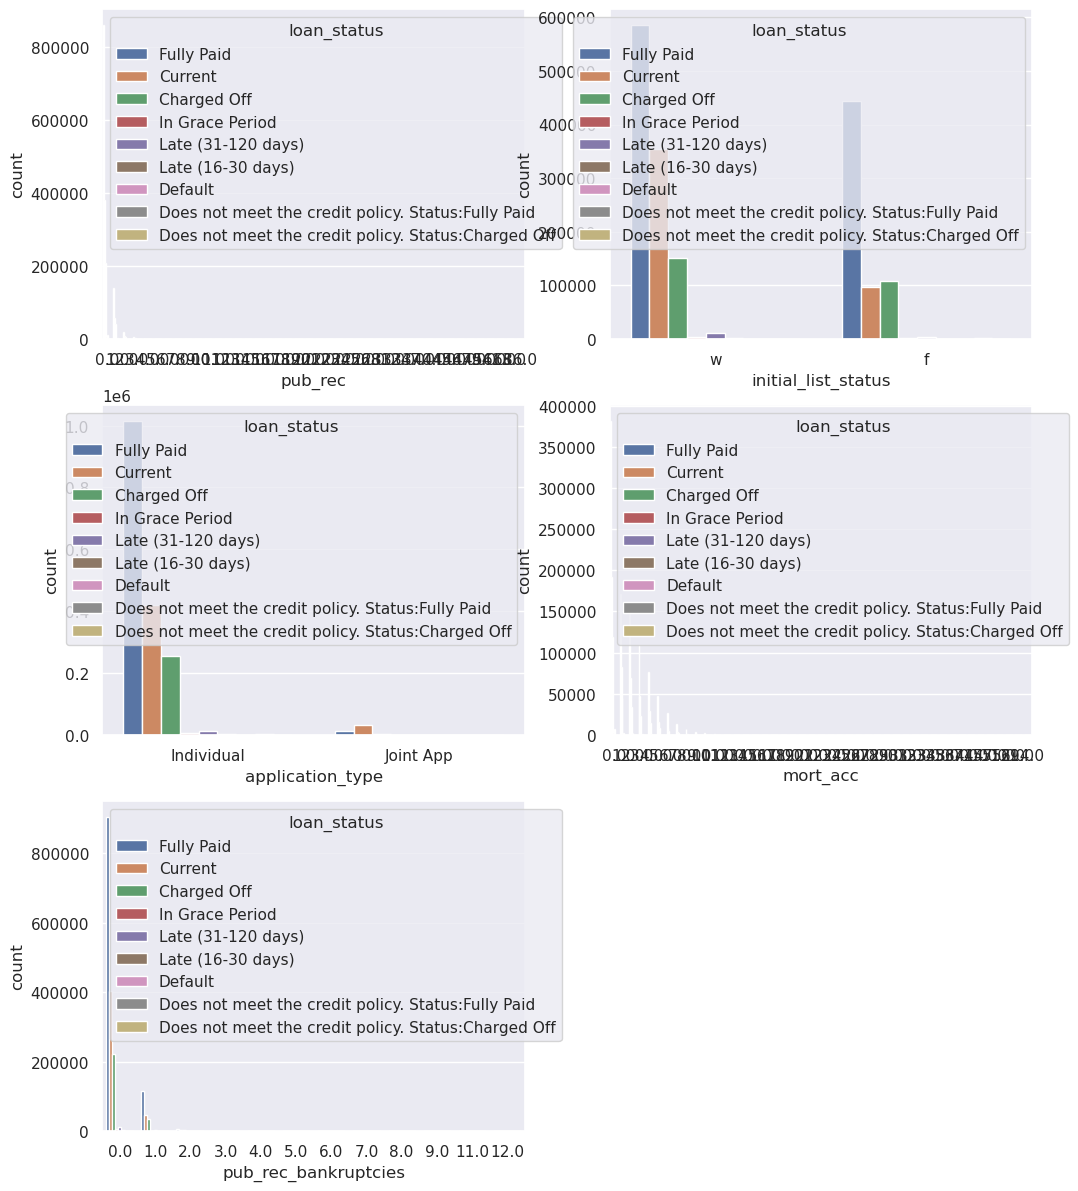

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=train, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=train, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=train, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=train, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=train, hue='loan_status')

In [ ]:
train.dtypes

loan_amnt            float64
funded_amnt          float64
term                  object
int_rate             float64
installment          float64
                      ...   
tax_liens            float64
tot_hi_cred_lim      float64
total_bal_ex_mort    float64
total_bc_limit       float64
target                 int64
Length: 91, dtype: object